<a href="https://www.kaggle.com/code/mohmdhmedi/price-prediction-with-lstm-google-stock?scriptVersionId=197359062" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p style="text-align:center;"><span style="font-size:48px;"><span style="color:navy;"><span style="font-family:cursive;"> Google Stock Price Prediction (2018-2024) </span> </span>  </span></p>

![google](https://www.freepnglogos.com/uploads/new-google-logo-png-0.png)

# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 💻</p>

<div style='border: 3px solid none; background-color: #f2f2f2; font-family: Times New Roman; font-size: 110%; padding: 10px'>

* **[1. Project Overview](#1)**

  - Description of the Google stock prediction project
  - Importance of using stock indicators like EMAs
  
   
* **[2. Methodology](#2)**

  - Why LSTM models?
  - Use of EMA and other technical indicators
  
    
* **[3. Libraries and Setup](#3)**

  - Key libraries: TensorFlow, PyTorch, Plotly, etc.
  
  
* **[4. Dataset](#4)**  

   - Importing Google stock data
   
   
* **[5. Feature Engineering and Visuals](#5)**

   - Creating EMAs and candlestick visualizations
    
   
* **[6. Model Design and Data Prepration](#6)**

   - LSTM model architecture for stock prediction
   
    
* **[7. Training Process](#7)**

   - Model training details and parameters
    
    
* **[8. Results Evaluation](#8)**

   - Comparing model outputs with real stock trends


<a id="1"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Project Overview </p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>


**Google Stock Price Prediction (2018-2024)**

This project utilizes Google stock price data from 2018 to 2024, focusing on daily timeframes. The dataset includes open, high, low, close, and volume values. The project also incorporates technical indicators like Exponential Moving Averages (EMA) and Bollinger Bands to enhance prediction accuracy.

</div>

<a id="2"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Methodology </p>

<div style='border: 3px solid none; background-color: #f2f2f2; padding: 10px'>


**LSTM for Stock Price Prediction**

The core of this project is predicting Google stock prices using Long Short-Term Memory (LSTM) models. LSTMs excel in time-series forecasting, capturing long-term dependencies within the data, making them perfect for the financial domain.

The project's goal is to predict stock price directional movements using 9-day, 21-day, and 30-day EMA models. Correct predictions can significantly improve trading strategies and profitability in stock markets.
Dataset

The project leverages technical analysis with data from indicators like:

   - 9-day EMA
   - 21-day EMA
   - 30-day EMA
   - Bollinger Bands

These indicators are combined with price data to provide a comprehensive view of Google stock behavior over time.
Key Techniques

- LSTM Networks: Used to forecast future price movements by understanding long-term patterns in stock price data.
- EMA Models: Applied for predicting stock prices based on various timeframes (9, 21, and 30 days).
    Visualization: Interactive candlestick charts and line graphs created using Plotly to visualize both actual prices and model predictions.

**Why PyTorch?**

PyTorch is used in this project for its flexibility in constructing and training LSTM models. It allows for easy model building and efficient handling of time-series data.
Summary

This project provides a robust LSTM-based prediction model for Google stock prices, offering valuable insights for traders and investors. By integrating EMAs and Bollinger Bands, it captures market trends and price movements to enhance trading decision-making.


</div>

<a id="3"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Libraries and Setup </p>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader



<a id="4"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset</p>

In [3]:
#Import the data

Data = pd.read_csv('/kaggle/input/google-stock/Google.csv')
Data

Unnamed: 0        open        high         low       close    adjclose  \
0     2016-01-04   37.150002   37.202999   36.562901   37.091999   37.091999   
1     2016-01-05   37.322498   37.599998   36.931999   37.129002   37.129002   
2     2016-01-06   36.500000   37.359001   36.445999   37.181000   37.181000   
3     2016-01-07   36.515499   36.924999   35.952999   36.319500   36.319500   
4     2016-01-08   36.572498   36.661499   35.650002   35.723499   35.723499   
...          ...         ...         ...         ...         ...         ...   
2108  2024-05-20  177.309998  179.949997  177.225006  178.460007  178.460007   
2109  2024-05-21  178.399994  179.820007  177.309998  179.539993  179.539993   
2110  2024-05-22  178.399994  178.852005  176.779999  178.000000  178.000000   
2111  2024-05-23  178.779999  179.910004  174.539993  175.059998  175.059998   
2112  2024-05-24  176.520004  177.304001  175.199997  176.330002  176.330002   

        volume ticker  
0     65456000   GOOG  
1     39014000   GOOG  
2     38940000   GOOG  
3     59274000   GOOG  
4     49018000   GOOG  
...        ...    ...  
2108  17495100   GOOG  
2109  14706000   GOOG  
2110  16189400   GOOG  
2111  14928400   GOOG  
2112  11400600   GOOG  

[2113 rows x 8 columns]

In [4]:
#Make DataFrame of csv file

df = pd.DataFrame(Data)
df

Unnamed: 0        open        high         low       close    adjclose  \
0     2016-01-04   37.150002   37.202999   36.562901   37.091999   37.091999   
1     2016-01-05   37.322498   37.599998   36.931999   37.129002   37.129002   
2     2016-01-06   36.500000   37.359001   36.445999   37.181000   37.181000   
3     2016-01-07   36.515499   36.924999   35.952999   36.319500   36.319500   
4     2016-01-08   36.572498   36.661499   35.650002   35.723499   35.723499   
...          ...         ...         ...         ...         ...         ...   
2108  2024-05-20  177.309998  179.949997  177.225006  178.460007  178.460007   
2109  2024-05-21  178.399994  179.820007  177.309998  179.539993  179.539993   
2110  2024-05-22  178.399994  178.852005  176.779999  178.000000  178.000000   
2111  2024-05-23  178.779999  179.910004  174.539993  175.059998  175.059998   
2112  2024-05-24  176.520004  177.304001  175.199997  176.330002  176.330002   

        volume ticker  
0     65456000   GOOG  
1     39014000   GOOG  
2     38940000   GOOG  
3     59274000   GOOG  
4     49018000   GOOG  
...        ...    ...  
2108  17495100   GOOG  
2109  14706000   GOOG  
2110  16189400   GOOG  
2111  14928400   GOOG  
2112  11400600   GOOG  

[2113 rows x 8 columns]

In [5]:
# Renaming the unnamed column to 'Date'
df.rename(columns={'Unnamed: 0': 'Date', 'open':'Open', 'high': 'High','low':'Low', 'close':'Close', 'adjclose': 'Adjclose', 'volume':'Volume'}, inplace=True)

# Converting the 'Date' column to datetime format for better time series handling
df['Date'] = pd.to_datetime(df['Date'])

# Setting 'Date' as the index (which is useful for time series data)
df.set_index('Date', inplace=True)
df

Open        High         Low       Close    Adjclose  \
Date                                                                     
2016-01-04   37.150002   37.202999   36.562901   37.091999   37.091999   
2016-01-05   37.322498   37.599998   36.931999   37.129002   37.129002   
2016-01-06   36.500000   37.359001   36.445999   37.181000   37.181000   
2016-01-07   36.515499   36.924999   35.952999   36.319500   36.319500   
2016-01-08   36.572498   36.661499   35.650002   35.723499   35.723499   
...                ...         ...         ...         ...         ...   
2024-05-20  177.309998  179.949997  177.225006  178.460007  178.460007   
2024-05-21  178.399994  179.820007  177.309998  179.539993  179.539993   
2024-05-22  178.399994  178.852005  176.779999  178.000000  178.000000   
2024-05-23  178.779999  179.910004  174.539993  175.059998  175.059998   
2024-05-24  176.520004  177.304001  175.199997  176.330002  176.330002   

              Volume ticker  
Date                         
2016-01-04  65456000   GOOG  
2016-01-05  39014000   GOOG  
2016-01-06  38940000   GOOG  
2016-01-07  59274000   GOOG  
2016-01-08  49018000   GOOG  
...              ...    ...  
2024-05-20  17495100   GOOG  
2024-05-21  14706000   GOOG  
2024-05-22  16189400   GOOG  
2024-05-23  14928400   GOOG  
2024-05-24  11400600   GOOG  

[2113 rows x 7 columns]

In [6]:
# Reset the index to make 'Date' a column again
df.reset_index(inplace=True)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: rows = 2, one for candlestick, one for volume
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.03, subplot_titles=('Google Stock Price', 'Volume'), 
                    row_width=[0.2, 0.7])

# Add Candlestick trace for the Google stock prices
fig.add_trace(go.Candlestick(x=df["Date"], open=df["Open"], high=df["High"],
                             low=df["Low"], close=df["Close"], name="Google"), 
              row=1, col=1)

# Add Volume trace for Google stock volume
fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], showlegend=False), row=2, col=1)

# Update layout to remove range slider and adjust title
fig.update_layout(
    yaxis_title='Google Stock Price (USD)',
    xaxis_rangeslider_visible=False
)

# Show figure
fig.show()


<a id="5"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Engineering and Visuals</p>

In [7]:
# Adding EMAs to the dataset
df['EMA_9'] = df['Close'].ewm(span=9, adjust=False).mean()
df['EMA_21'] = df['Close'].ewm(span=21, adjust=False).mean()
df['EMA_30'] = df['Close'].ewm(span=30, adjust=False).mean()

# Filling NaN values with the Close values
df['EMA_9'] = df['EMA_9'].fillna(df['Close'])
df['EMA_21'] = df['EMA_21'].fillna(df['Close'])
df['EMA_30'] = df['EMA_30'].fillna(df['Close'])


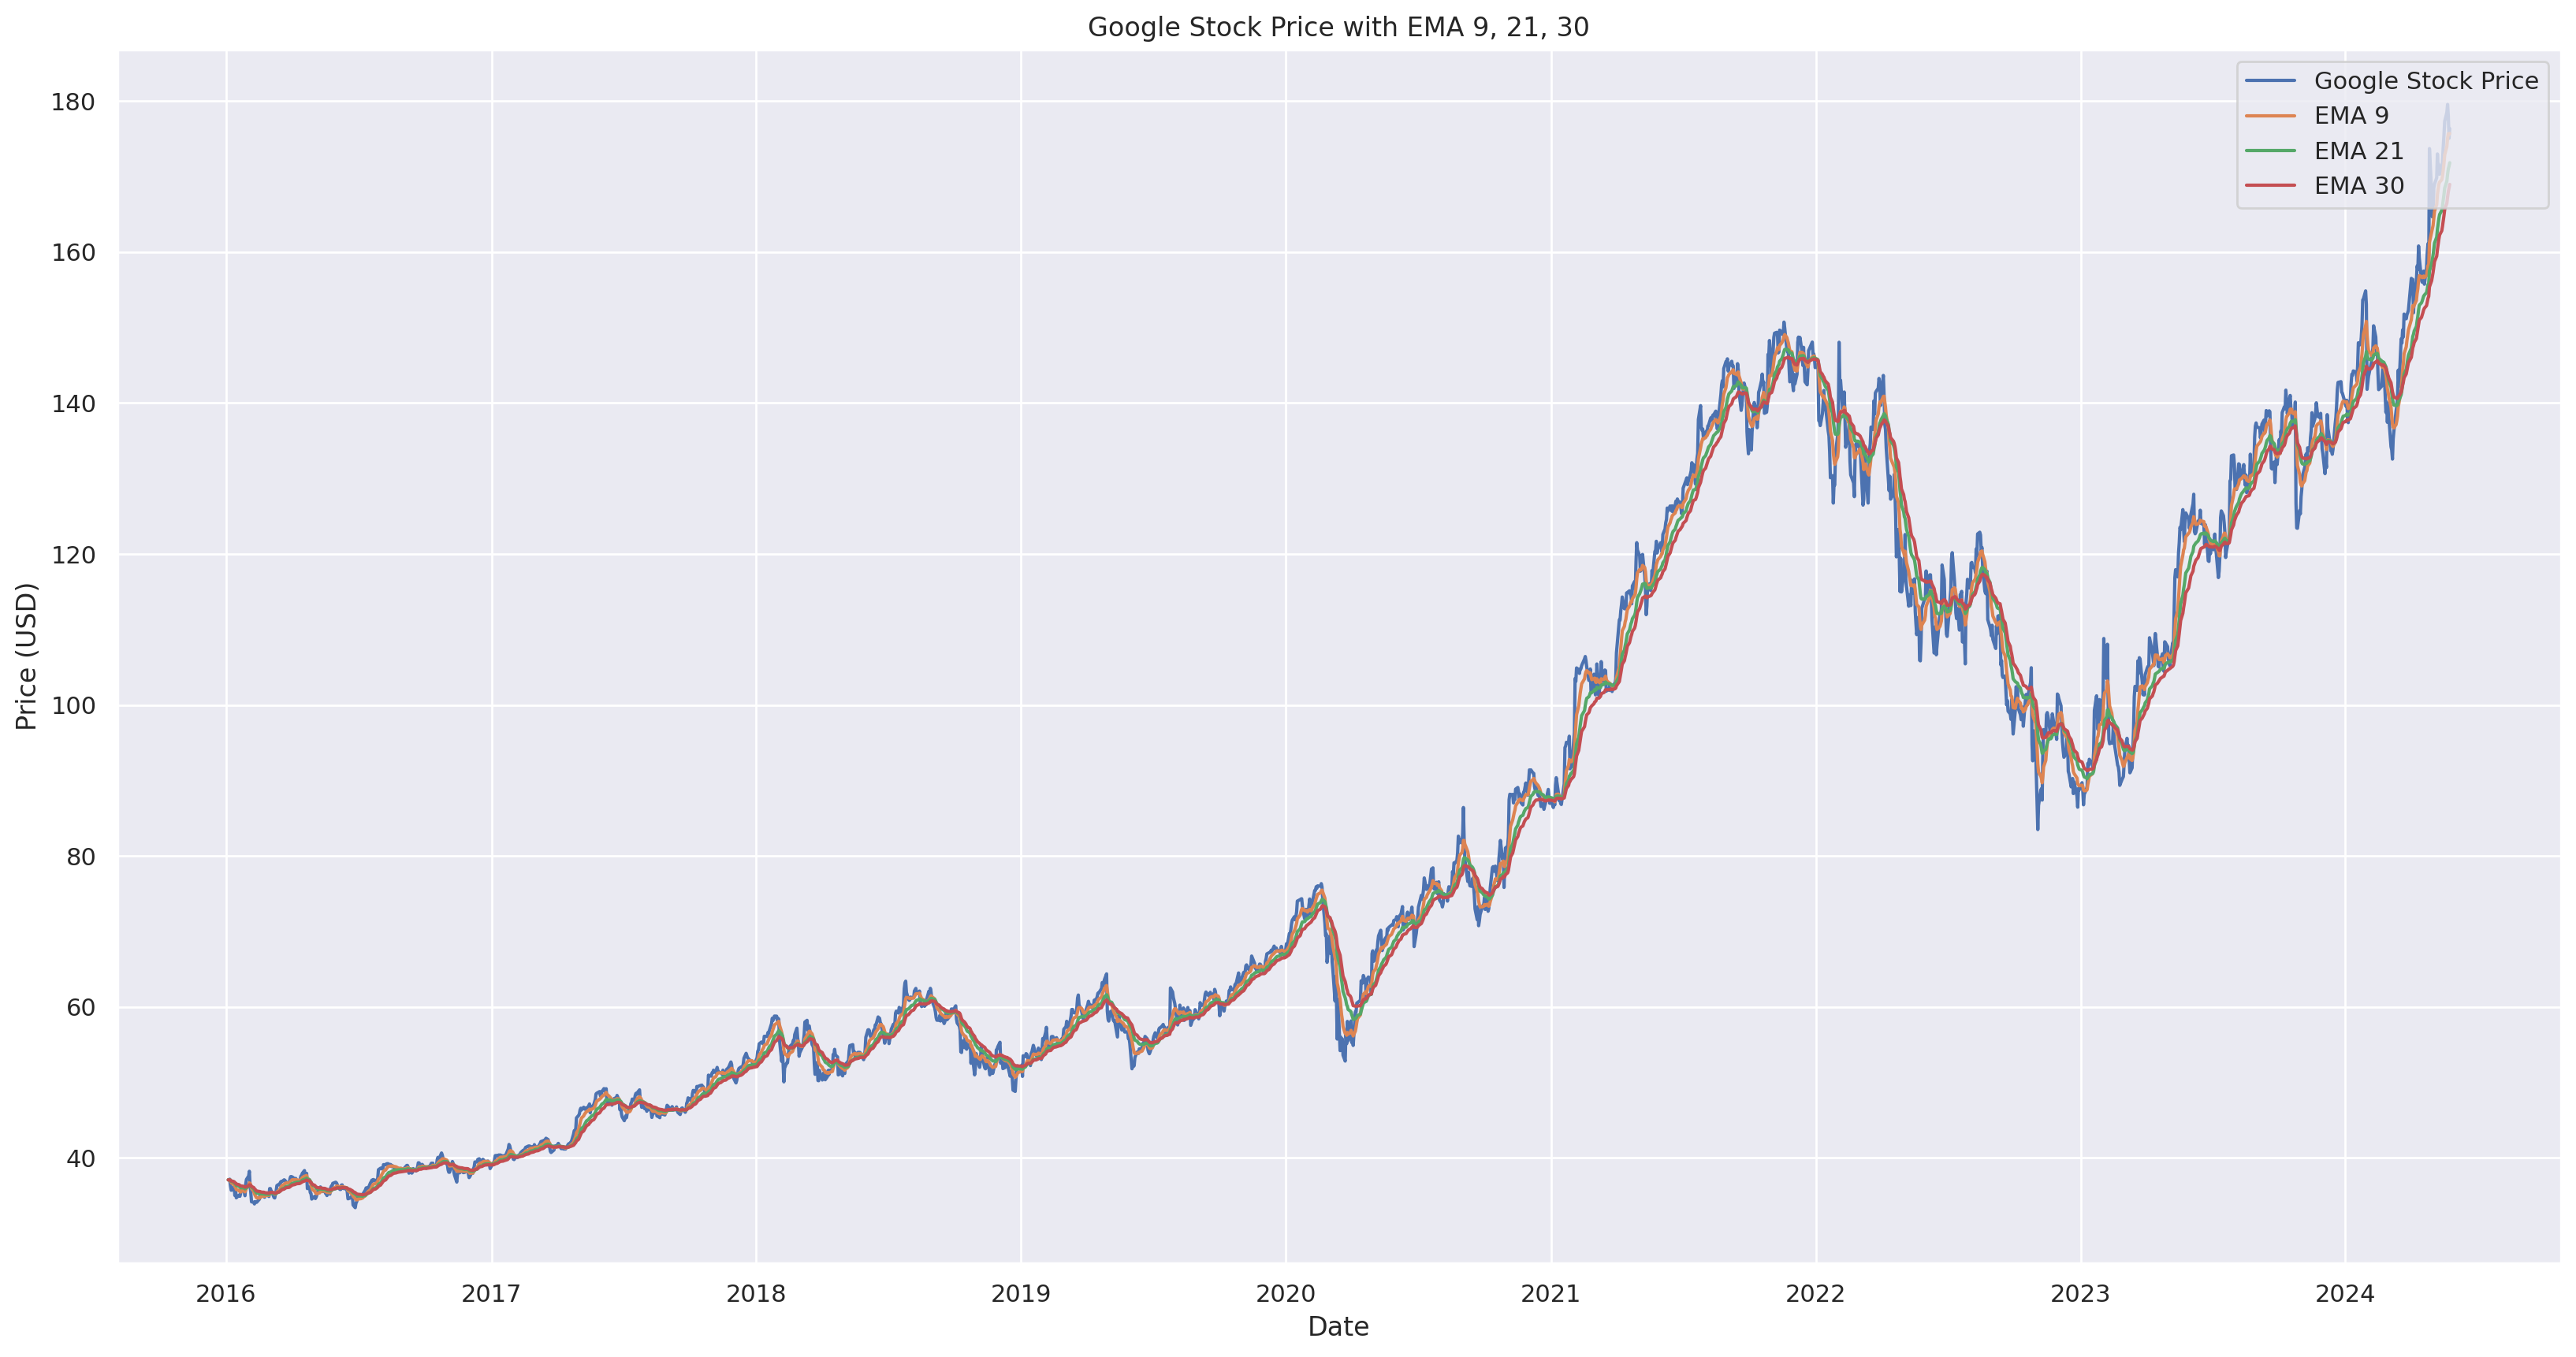

In [8]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
# Plotting EMAs with closing price using matplotlib
plt.figure(figsize=(20,10), dpi=200)
plt.plot(df['Date'], df['Close'], label='Google Stock Price')
plt.plot(df['Date'], df['EMA_9'], label='EMA 9')
plt.plot(df['Date'], df['EMA_21'], label='EMA 21')
plt.plot(df['Date'], df['EMA_30'], label='EMA 30')
plt.title('Google Stock Price with EMA 9, 21, 30')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend(loc='upper right')
plt.show()


In [9]:
import plotly.graph_objects as go

# Plotting EMAs with Candlestick chart using plotly
fig = go.Figure(data=go.Candlestick(x=df["Date"], open=df["Open"], high=df["High"],
                                    low=df["Low"], close=df["Close"], name="Google Stock"))

# Adding EMA lines
fig.add_trace(go.Scatter(x=df['Date'], y=df['EMA_9'], line_color='#7295ee', name="EMA 9", mode='lines'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['EMA_21'], line_color='#fcb539', name="EMA 21", mode='lines'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['EMA_30'], line_color='#bd39fc', name="EMA 30", mode='lines'))

# Updating layout for better visualization
fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    xaxis_rangeslider_visible=False
)

fig.show()


In [10]:
# Define parameters
window_size = 15
num_std = 4

# Calculate rolling mean and standard deviation for EMA_9
rolling_mean_9 = np.convolve(df['EMA_9'], np.ones(window_size)/window_size, mode='valid')
rolling_std_9 = np.std([df['EMA_9'][i:i+window_size] for i in range(len(df['EMA_9'])-window_size+1)], axis=1)

# Calculate Bollinger Bands for EMA_9
upper_band_9 = rolling_mean_9 + num_std * rolling_std_9
lower_band_9 = rolling_mean_9 - num_std * rolling_std_9

# Calculate rolling mean and standard deviation for EMA_21
rolling_mean_21 = np.convolve(df['EMA_21'], np.ones(window_size)/window_size, mode='valid')
rolling_std_21 = np.std([df['EMA_21'][i:i+window_size] for i in range(len(df['EMA_21'])-window_size+1)], axis=1)

# Calculate Bollinger Bands for EMA_21
upper_band_21 = rolling_mean_21 + num_std * rolling_std_21
lower_band_21 = rolling_mean_21 - num_std * rolling_std_21

# Calculate rolling mean and standard deviation for EMA_30
rolling_mean_30 = np.convolve(df['EMA_30'], np.ones(window_size)/window_size, mode='valid')
rolling_std_30 = np.std([df['EMA_30'][i:i+window_size] for i in range(len(df['EMA_30'])-window_size+1)], axis=1)

# Calculate Bollinger Bands for EMA_30
upper_band_30 = rolling_mean_30 + num_std * rolling_std_30
lower_band_30 = rolling_mean_30 - num_std * rolling_std_30


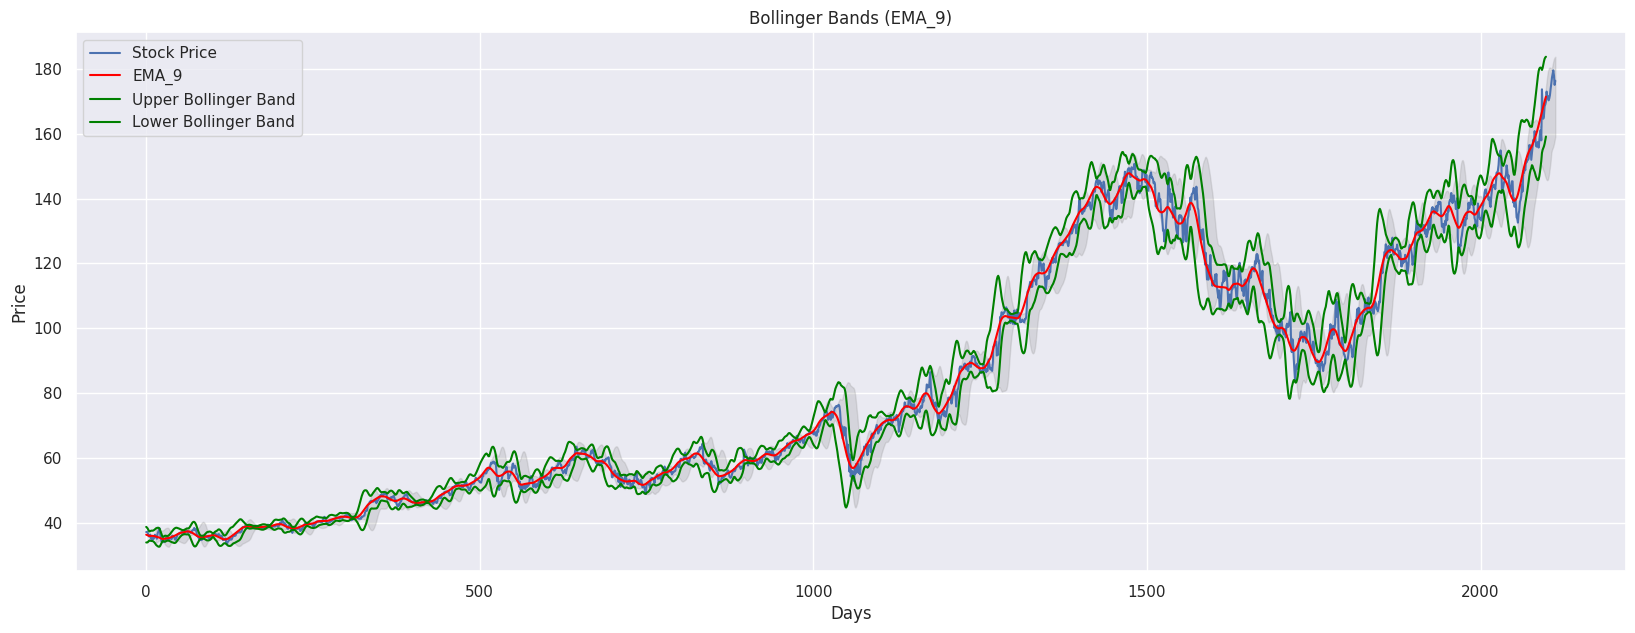

In [11]:
plt.figure(figsize=(20,7))
plt.plot(df['Close'], label='Stock Price')
plt.plot(rolling_mean_9, label='EMA_9', color='red')
plt.plot(upper_band_9, label='Upper Bollinger Band', color='green')
plt.plot(lower_band_9, label='Lower Bollinger Band', color='green')
plt.fill_between(np.arange(window_size-1, len(df['EMA_9'])), lower_band_9, upper_band_9, color='grey', alpha=0.2)
plt.title('Bollinger Bands (EMA_9)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


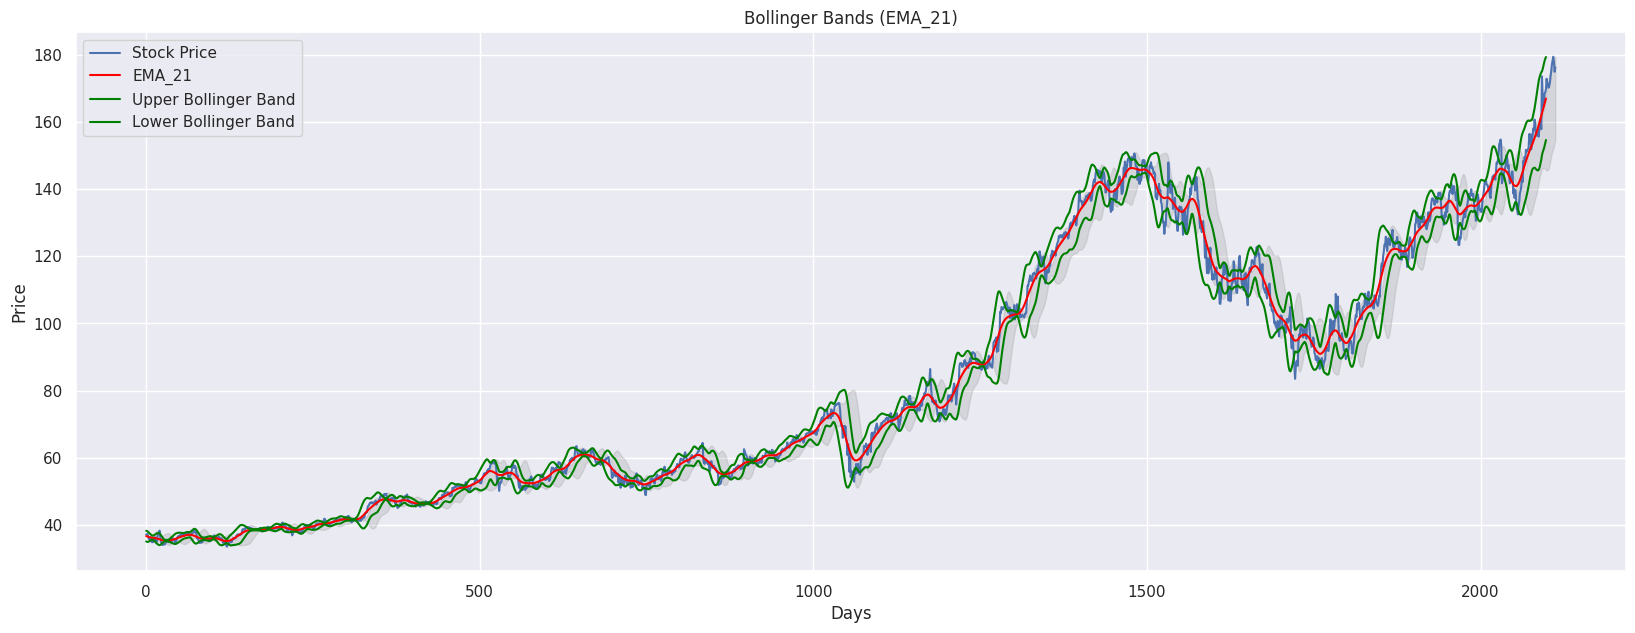

In [12]:
plt.figure(figsize=(20,7))
plt.plot(df['Close'], label='Stock Price')
plt.plot(rolling_mean_21, label='EMA_21', color='red')
plt.plot(upper_band_21, label='Upper Bollinger Band', color='green')
plt.plot(lower_band_21, label='Lower Bollinger Band', color='green')
plt.fill_between(np.arange(window_size-1, len(df['EMA_21'])), lower_band_21, upper_band_21, color='grey', alpha=0.2)
plt.title('Bollinger Bands (EMA_21)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


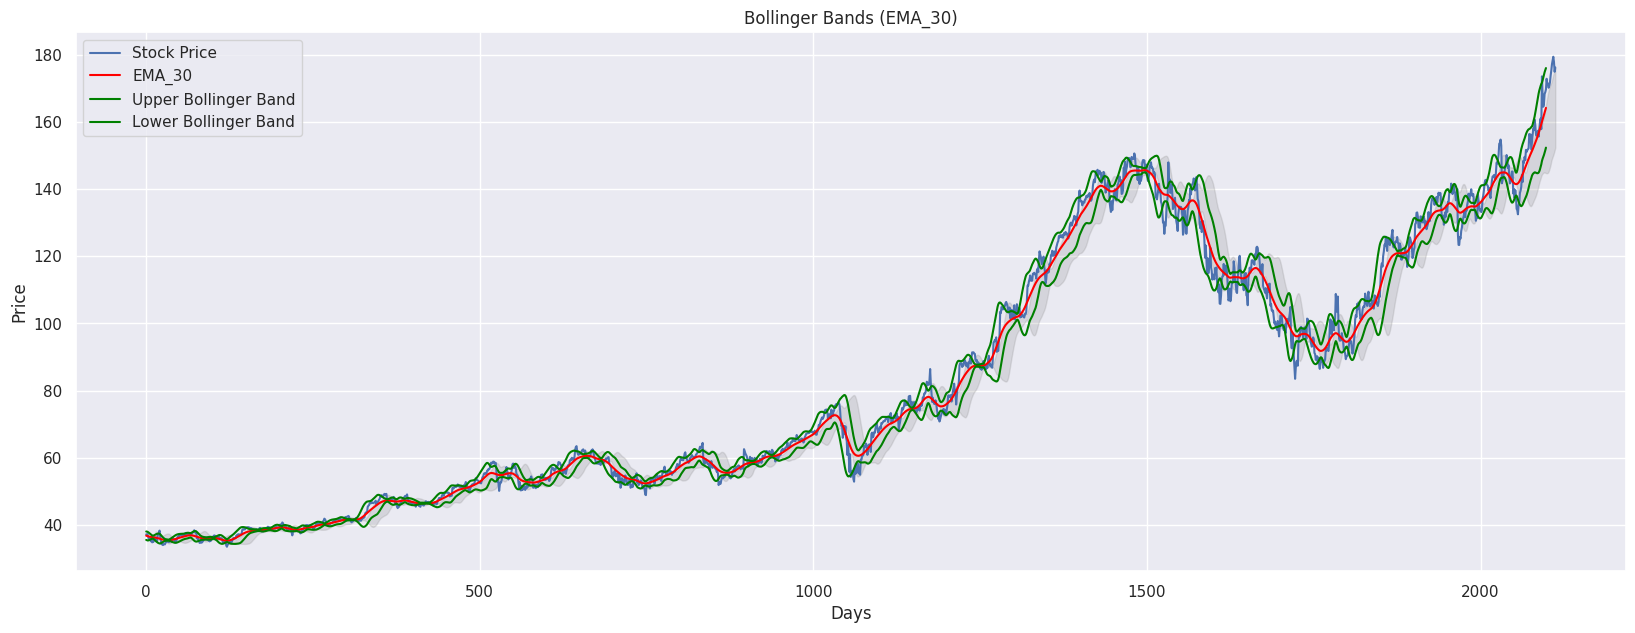

In [13]:
plt.figure(figsize=(20,7))
plt.plot(df['Close'], label='Stock Price')
plt.plot(rolling_mean_30, label='EMA_30', color='red')
plt.plot(upper_band_30, label='Upper Bollinger Band', color='green')
plt.plot(lower_band_30, label='Lower Bollinger Band', color='green')
plt.fill_between(np.arange(window_size-1, len(df['EMA_30'])), lower_band_30, upper_band_30, color='grey', alpha=0.2)
plt.title('Bollinger Bands (EMA_30)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import seaborn as sns

# Setting the seaborn style for the plot
sns.set(style="darkgrid")

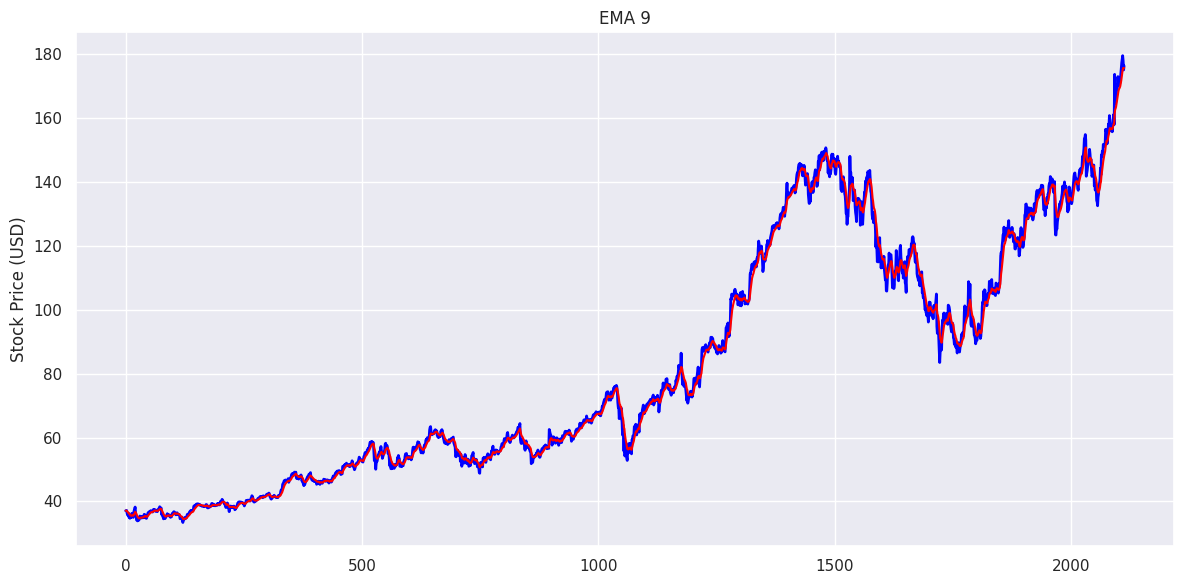

In [15]:
# Plotting the EMAs (9, 21, 30) in separate charts
plt.figure(figsize=(12, 6))


# Plotting closing price
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=2)
plt.plot(df['EMA_9'], label='EMA 9', color='red')
plt.title('EMA 9')
plt.ylabel('Stock Price (USD)')

plt.tight_layout()
plt.show()


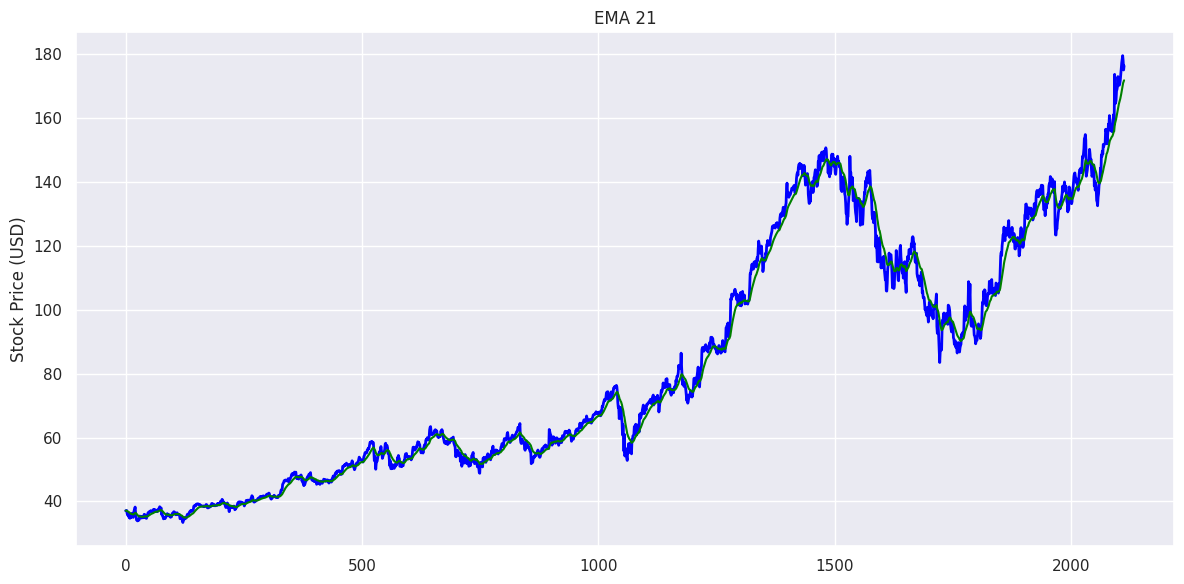

In [16]:
plt.figure(figsize=(12, 6))
# Plotting closing price
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=2)
plt.plot(df['EMA_21'], label='EMA 21', color='green')
plt.title('EMA 21')
plt.ylabel('Stock Price (USD)')

plt.tight_layout()
plt.show()



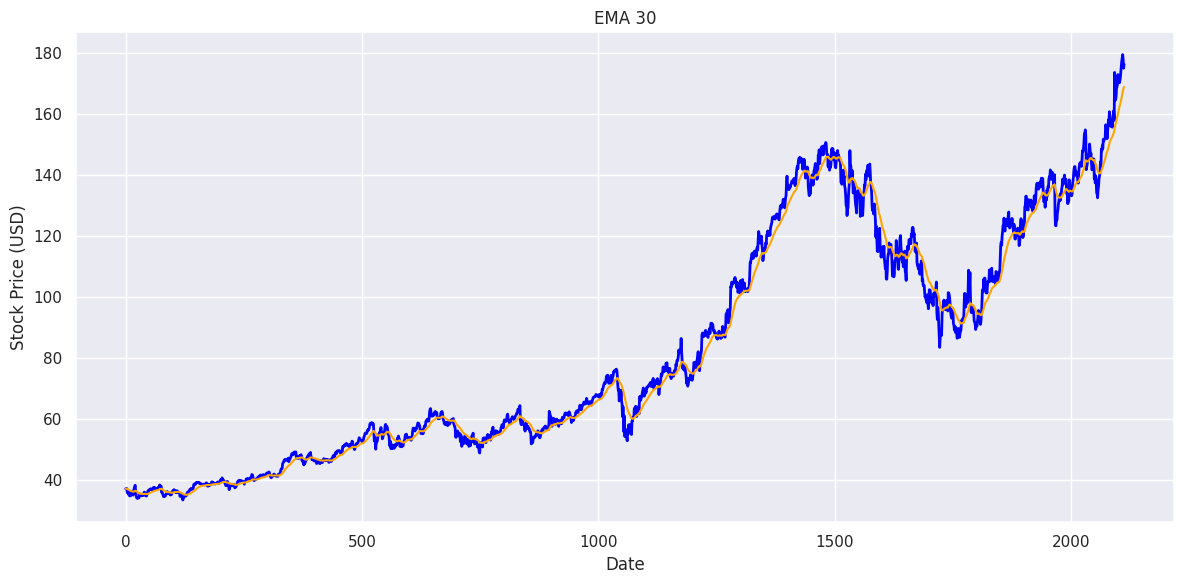

In [17]:
plt.figure(figsize=(12, 6))
# Plotting closing price
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=2)
plt.plot(df['EMA_30'], label='EMA 30', color='orange')
plt.title('EMA 30')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.tight_layout()
plt.show()

<a id="6"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Design and Data Prepration</p>

In [18]:
df['Days'] = df.index + 1
_9d = df[['Open','High','Low','Days', 'EMA_9','Volume','Close']].copy(deep=True)
_21d = df[['Open','High','Low','Days', 'EMA_21','Volume','Close']].copy(deep=True)
_30d = df[['Open','High','Low','Days', 'EMA_30','Volume','Close']].copy(deep=True)
_all = df[['Open','High','Low','Days', 'EMA_9', 'EMA_21', 'EMA_30','Volume','Close']].copy(deep=True)

scaler = MinMaxScaler(feature_range=(0,2)).fit(_9d.Low.values.reshape(-1,1))
_9d['Open'] = scaler.transform(_9d.Open.values.reshape(-1,1))
_9d['High'] = scaler.transform(_9d.High.values.reshape(-1,1))
_9d['Low'] = scaler.transform(_9d.Low.values.reshape(-1,1))
_9d['Close'] = scaler.transform(_9d.Close.values.reshape(-1,1))
_9d['Volume'] = scaler.transform(_9d.Volume.values.reshape(-1,1))
_9d['Days'] = scaler.transform(_9d.Days.values.reshape(-1,1))
_9d['EMA_9'] = scaler.transform(_9d['EMA_9'].values.reshape(-1,1))

scaler = MinMaxScaler(feature_range=(0,2)).fit(_21d.Low.values.reshape(-1,1))
_21d['Open'] = scaler.transform(_21d.Open.values.reshape(-1,1))
_21d['High'] = scaler.transform(_21d.High.values.reshape(-1,1))
_21d['Low'] = scaler.transform(_21d.Low.values.reshape(-1,1))
_21d['Close'] = scaler.transform(_21d.Close.values.reshape(-1,1))
_21d['Volume'] = scaler.transform(_21d.Volume.values.reshape(-1,1))
_21d['Days'] = scaler.transform(_21d.Days.values.reshape(-1,1))
_21d['EMA_21'] = scaler.transform(_21d['EMA_21'].values.reshape(-1,1))

scaler = MinMaxScaler(feature_range=(0,2)).fit(_30d.Low.values.reshape(-1,1))
_30d['Open'] = scaler.transform(_30d.Open.values.reshape(-1,1))
_30d['High'] = scaler.transform(_30d.High.values.reshape(-1,1))
_30d['Low'] = scaler.transform(_30d.Low.values.reshape(-1,1))
_30d['Close'] = scaler.transform(_30d.Close.values.reshape(-1,1))
_30d['Volume'] = scaler.transform(_30d.Volume.values.reshape(-1,1))
_30d['Days'] = scaler.transform(_30d.Days.values.reshape(-1,1))
_30d['EMA_30'] = scaler.transform(_30d.EMA_30.values.reshape(-1,1))


# Scaling _all data based on EMAs
scaler = MinMaxScaler(feature_range=(0,2)).fit(_all.Low.values.reshape(-1,1))
_all['Open'] = scaler.transform(_all.Open.values.reshape(-1,1))
_all['High'] = scaler.transform(_all.High.values.reshape(-1,1))
_all['Low'] = scaler.transform(_all.Low.values.reshape(-1,1))
_all['Close'] = scaler.transform(_all.Close.values.reshape(-1,1))
_all['Volume'] = scaler.transform(_all.Volume.values.reshape(-1,1))
_all['Days'] = scaler.transform(_all.Days.values.reshape(-1,1))
_all['EMA_9'] = scaler.transform(_all['EMA_9'].values.reshape(-1,1))
_all['EMA_21'] = scaler.transform(_all['EMA_21'].values.reshape(-1,1))
_all['EMA_30'] = scaler.transform(_all['EMA_30'].values.reshape(-1,1))

# Extract the scaled data for different periods
data_9d_all = _9d[['Open','High','Low','Close', 'EMA_9', 'Volume', 'Days']].values
data_9d = _9d[['Open','High','Low','Close', 'EMA_9']].values
data_21d_all = _21d[['Open','High','Low','Close', 'EMA_21', 'Volume', 'Days']].values
data_21d = _21d[['Open','High','Low', 'EMA_21','Close']].values
data_30d_all = _30d[['Open','High','Low','Close', 'EMA_30', 'Volume', 'Days']].values
data_30d = _30d[['Open','High','Low', 'EMA_30','Close']].values
data_all = _all[['Open','High','Low', 'EMA_9', 'EMA_21', 'EMA_30','Close']].values




In [19]:
# Printing the shapes
print(data_9d_all.shape)
print(data_9d.shape)
print(data_21d_all.shape)
print(data_21d.shape)
print(data_30d_all.shape)
print(data_30d.shape)
print(data_all.shape)

(2113, 7)
(2113, 5)
(2113, 7)
(2113, 5)
(2113, 7)
(2113, 5)
(2113, 7)


In [20]:
seq_len = 11

# 9-day EMA sequences
sequences_9d_all = []
for index in range(len(data_9d_all) - seq_len + 1): 
    sequences_9d_all.append(data_9d_all[index: index + seq_len])
sequences_9d_all = np.array(sequences_9d_all)
print(sequences_9d_all.shape)

# 9d EMA sequences without volume and days
sequences_9d = []
for index in range(len(data_9d) - seq_len + 1): 
    sequences_9d.append(data_9d[index: index + seq_len])
sequences_9d = np.array(sequences_9d)
print(sequences_9d.shape)

# 21-day EMA sequences
sequences_21d = []
for index in range(len(data_21d) - seq_len + 1): 
    sequences_21d.append(data_21d[index: index + seq_len])
sequences_21d = np.array(sequences_21d)
print(sequences_21d.shape)

# 21-day all EMA sequences
sequences_21d_all = []
for index in range(len(data_21d_all) - seq_len + 1): 
    sequences_21d_all.append(data_21d_all[index: index + seq_len])
sequences_21d_all = np.array(sequences_21d)
print(sequences_21d_all.shape)

# 30-day EMA sequences
sequences_30d = []
for index in range(len(data_30d) - seq_len + 1): 
    sequences_30d.append(data_30d[index: index + seq_len])
sequences_30d = np.array(sequences_30d)
print(sequences_30d.shape)

# 30-day all EMA sequences
sequences_30d_all = []
for index in range(len(data_30d_all) - seq_len + 1): 
    sequences_30d_all.append(data_30d_all[index: index + seq_len])
sequences_30d_all = np.array(sequences_30d_all)
print(sequences_30d_all.shape)

# All EMAs combined
sequences_all = []
for index in range(len(data_all) - seq_len + 1): 
    sequences_all.append(data_all[index: index + seq_len])
sequences_all = np.array(sequences_all)
print(sequences_all.shape)


(2103, 11, 7)
(2103, 11, 5)
(2103, 11, 5)
(2103, 11, 5)
(2103, 11, 5)
(2103, 11, 7)
(2103, 11, 7)


# Train and Test 

In [21]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

# For 9d dataset
valid_set_size_9d = int(np.round(valid_set_size_percentage/100 * sequences_9d.shape[0]))  
test_set_size_9d  = int(np.round(test_set_size_percentage/100 * sequences_9d.shape[0]))
train_set_size_9d = sequences_9d.shape[0] - (valid_set_size_9d + test_set_size_9d)

x_train_9d = sequences_9d[:train_set_size_9d, :-1, :]
y_train_9d = sequences_9d[:train_set_size_9d, -1, :]

x_valid_9d = sequences_9d[train_set_size_9d:train_set_size_9d + valid_set_size_9d, :-1, :]
y_valid_9d = sequences_9d[train_set_size_9d:train_set_size_9d + valid_set_size_9d, -1, :]

x_test_9d = sequences_9d[train_set_size_9d + valid_set_size_9d:, :-1, :]
y_test_9d = sequences_9d[train_set_size_9d + valid_set_size_9d:, -1, :]

# For 21d dataset
valid_set_size_21d = int(np.round(valid_set_size_percentage/100 * sequences_21d.shape[0]))  
test_set_size_21d  = int(np.round(test_set_size_percentage/100 * sequences_21d.shape[0]))
train_set_size_21d = sequences_21d.shape[0] - (valid_set_size_21d + test_set_size_21d)

x_train_21d = sequences_21d[:train_set_size_21d, :-1, :]
y_train_21d = sequences_21d[:train_set_size_21d, -1, :]

x_valid_21d = sequences_21d[train_set_size_21d:train_set_size_21d + valid_set_size_21d, :-1, :]
y_valid_21d = sequences_21d[train_set_size_21d:train_set_size_21d + valid_set_size_21d, -1, :]

x_test_21d = sequences_21d[train_set_size_21d + valid_set_size_21d:, :-1, :]
y_test_21d = sequences_21d[train_set_size_21d + valid_set_size_21d:, -1, :]

# For 30d dataset
valid_set_size_30d = int(np.round(valid_set_size_percentage/100 * sequences_30d.shape[0]))  
test_set_size_30d  = int(np.round(test_set_size_percentage/100 * sequences_30d.shape[0]))
train_set_size_30d = sequences_30d.shape[0] - (valid_set_size_30d + test_set_size_30d)

x_train_30d = sequences_30d[:train_set_size_30d, :-1, :]
y_train_30d = sequences_30d[:train_set_size_30d, -1, :]

x_valid_30d = sequences_30d[train_set_size_30d:train_set_size_30d + valid_set_size_30d, :-1, :]
y_valid_30d = sequences_30d[train_set_size_30d:train_set_size_30d + valid_set_size_30d, -1, :]

x_test_30d = sequences_30d[train_set_size_30d + valid_set_size_30d:, :-1, :]
y_test_30d = sequences_30d[train_set_size_30d + valid_set_size_30d:, -1, :]

# For the combined dataset
valid_set_size_all = int(np.round(valid_set_size_percentage/100 * sequences_all.shape[0]))  
test_set_size_all  = int(np.round(test_set_size_percentage/100 * sequences_all.shape[0]))
train_set_size_all = sequences_all.shape[0] - (valid_set_size_all + test_set_size_all)

x_train_all = sequences_all[:train_set_size_all, :-1, :]
y_train_all = sequences_all[:train_set_size_all, -1, :]

x_valid_all = sequences_all[train_set_size_all:train_set_size_all + valid_set_size_all, :-1, :]
y_valid_all = sequences_all[train_set_size_all:train_set_size_all + valid_set_size_all, -1, :]

x_test_all = sequences_all[train_set_size_all + valid_set_size_all:, :-1, :]
y_test_all = sequences_all[train_set_size_all + valid_set_size_all:, -1, :]


# Torch.Tensor

In [22]:
# For 9d dataset
x_train_9d = torch.tensor(x_train_9d).float()
y_train_9d = torch.tensor(y_train_9d).float()

x_valid_9d = torch.tensor(x_valid_9d).float()
y_valid_9d = torch.tensor(y_valid_9d).float()

train_dataset_9d = TensorDataset(x_train_9d, y_train_9d)
train_dataloader_9d = DataLoader(train_dataset_9d, batch_size=32, shuffle=False)

valid_dataset_9d = TensorDataset(x_valid_9d, y_valid_9d)
valid_dataloader_9d = DataLoader(valid_dataset_9d, batch_size=32, shuffle=False)

# For 21d dataset
x_train_21d = torch.tensor(x_train_21d).float()
y_train_21d = torch.tensor(y_train_21d).float()

x_valid_21d = torch.tensor(x_valid_21d).float()
y_valid_21d = torch.tensor(y_valid_21d).float()

train_dataset_21d = TensorDataset(x_train_21d, y_train_21d)
train_dataloader_21d = DataLoader(train_dataset_21d, batch_size=32, shuffle=False)

valid_dataset_21d = TensorDataset(x_valid_21d, y_valid_21d)
valid_dataloader_21d = DataLoader(valid_dataset_21d, batch_size=32, shuffle=False)

# For 30d dataset
x_train_30d = torch.tensor(x_train_30d).float()
y_train_30d = torch.tensor(y_train_30d).float()

x_valid_30d = torch.tensor(x_valid_30d).float()
y_valid_30d = torch.tensor(y_valid_30d).float()

train_dataset_30d = TensorDataset(x_train_30d, y_train_30d)
train_dataloader_30d = DataLoader(train_dataset_30d, batch_size=32, shuffle=False)

valid_dataset_30d = TensorDataset(x_valid_30d, y_valid_30d)
valid_dataloader_30d = DataLoader(valid_dataset_30d, batch_size=32, shuffle=False)

# For the combined dataset
x_train_all = torch.tensor(x_train_all).float()
y_train_all = torch.tensor(y_train_all).float()

x_valid_all = torch.tensor(x_valid_all).float()
y_valid_all = torch.tensor(y_valid_all).float()

train_dataset_all = TensorDataset(x_train_all, y_train_all)
train_dataloader_all = DataLoader(train_dataset_all, batch_size=32, shuffle=False)

valid_dataset_all = TensorDataset(x_valid_all, y_valid_all)
valid_dataloader_all = DataLoader(valid_dataset_all, batch_size=32, shuffle=False)


<a id="7"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Training Process</p>

# Structure of LSTM

In [23]:
class NeuralNetwork(nn.Module):
    def __init__(self, num_feature):
        super(NeuralNetwork, self).__init__()
        self.lstm = nn.LSTM(num_feature, 64, batch_first=True)
        self.fc = nn.Linear(64, num_feature)  # Output layer matches num_feature
        
    def forward(self, x):
        output, (hidden, cell) = self.lstm(x)
        x = self.fc(hidden[-1])
        return x


# Model Number 1: All Features

In [24]:
model_all = NeuralNetwork(7) 

optimizer = optim.Adam(model_all.parameters())
mse = nn.MSELoss()


In [25]:
def train(dataloader):
    epoch_loss = 0
    model_all.train()
    
    for batch in dataloader:
        optimizer.zero_grad()
        x, y = batch
        pred = model_all(x)
        # Adjust loss calculation if needed
        loss = mse(pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    return epoch_loss


In [26]:
def evaluate(dataloader):
    epoch_loss = 0
    model_all.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x, y = batch
            pred = model_all(x)
            loss = mse(pred[:, 0], y[:, 0])  # Ensure correct dimensionality for evaluation
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)


In [27]:
n_epochs = 100
best_valid_loss_all = float('inf')

for epoch in range(1, n_epochs + 1):
    train_loss_all = train(train_dataloader_all)  # Updated to all
    valid_loss_all = evaluate(valid_dataloader_all)
    
    # Save the best model
    if valid_loss_all < best_valid_loss_all:
        best_valid_loss_all = valid_loss_all
        torch.save(model_all, 'saved_weights_all.pt')

    # Print training and validation loss
    print(f'\tTrain Loss: {train_loss_all:.5f} | ' + f'\tVal Loss: {valid_loss_all:.5f}\n')


	Train Loss: 0.91346 | 	Val Loss: 0.03455

	Train Loss: 3.94317 | 	Val Loss: 0.25838

	Train Loss: 2.69739 | 	Val Loss: 0.09554

	Train Loss: 0.49791 | 	Val Loss: 0.02020

	Train Loss: 0.19342 | 	Val Loss: 0.00500

	Train Loss: 0.12954 | 	Val Loss: 0.00324

	Train Loss: 0.12411 | 	Val Loss: 0.00456

	Train Loss: 0.20478 | 	Val Loss: 0.01233

	Train Loss: 0.49185 | 	Val Loss: 0.03617

	Train Loss: 0.66997 | 	Val Loss: 0.05582

	Train Loss: 0.36519 | 	Val Loss: 0.03153

	Train Loss: 0.19303 | 	Val Loss: 0.01899

	Train Loss: 0.12790 | 	Val Loss: 0.00923

	Train Loss: 0.09765 | 	Val Loss: 0.00636

	Train Loss: 0.09549 | 	Val Loss: 0.00655

	Train Loss: 0.11434 | 	Val Loss: 0.00867

	Train Loss: 0.15092 | 	Val Loss: 0.01253

	Train Loss: 0.19858 | 	Val Loss: 0.01736

	Train Loss: 0.23763 | 	Val Loss: 0.02060

	Train Loss: 0.24076 | 	Val Loss: 0.02015

	Train Loss: 0.20941 | 	Val Loss: 0.01780

	Train Loss: 0.17235 | 	Val Loss: 0.01531

	Train Loss: 0.14225 | 	Val Loss: 0.01297

	Train Loss

In [28]:
# Load the trained model
model_all = torch.load('saved_weights_all.pt')

In [29]:
# Convert test data to tensor
x_test_all = torch.tensor(x_test_all).float()

# Get predictions from the model
with torch.no_grad():
    y_test_pred_all = model_all(x_test_all)

# Convert predictions to numpy
y_test_pred_all = y_test_pred_all.numpy()

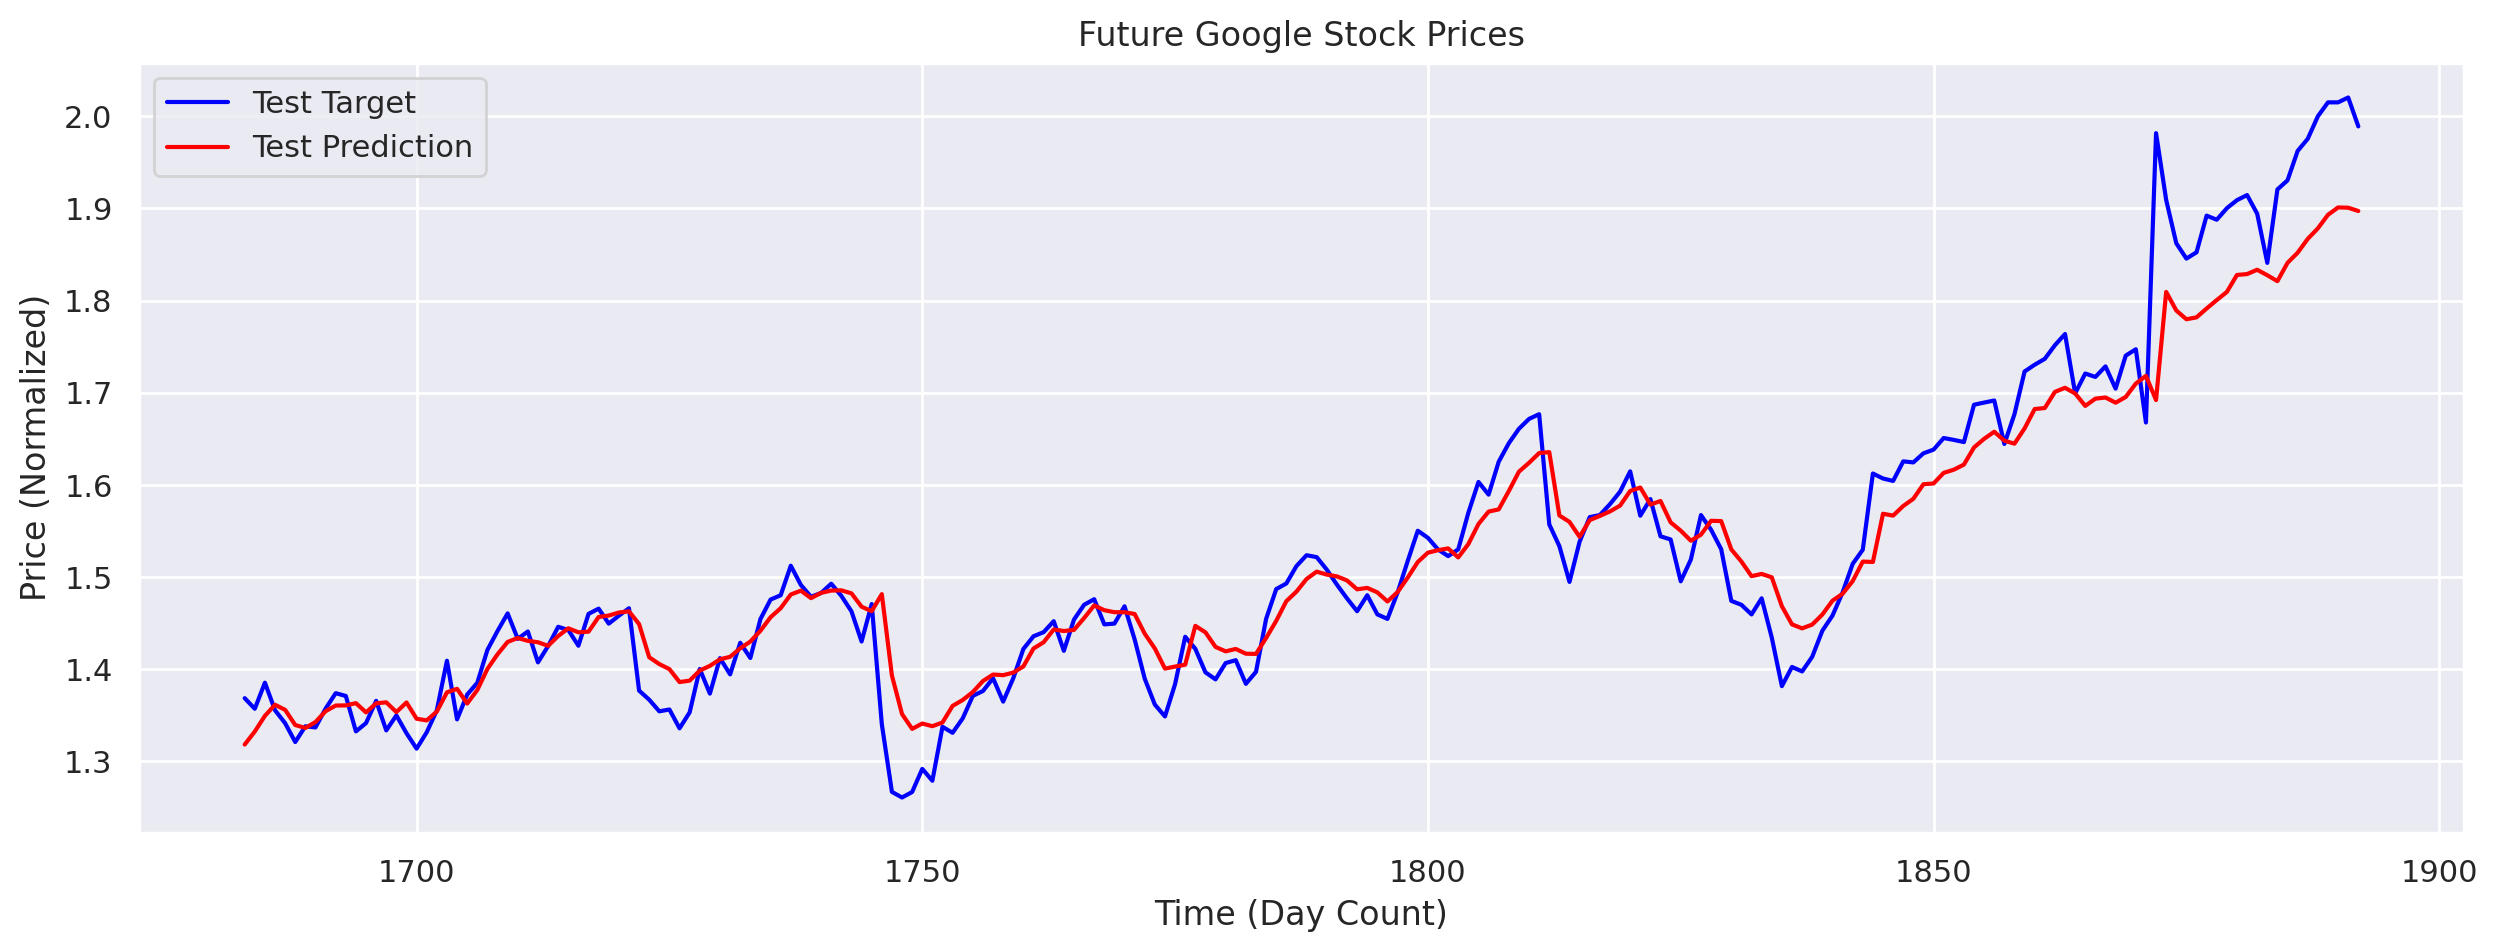

In [30]:
# Plot the results
idx = 0  # Index of the target feature to visualize, adjust if necessary
plt.figure(figsize=(15, 5), dpi=200)

# Plot the test targets
plt.plot(np.arange(y_train_all.shape[0], y_train_all.shape[0] + y_test_all.shape[0]),
         y_test_all[:, idx], color='blue', label='Test Target')

# Plot the test predictions
plt.plot(np.arange(y_train_all.shape[0], y_train_all.shape[0] + y_test_pred_all.shape[0]),
         y_test_pred_all[:, idx], color='red', label='Test Prediction')

plt.title('Future Google Stock Prices')
plt.xlabel('Time (Day Count)')
plt.ylabel('Price (Normalized)')
plt.legend(loc='best')
plt.show()

# Model Number 2: 30 Days with all features

In [31]:
model_30d_all = NeuralNetwork(5) 

optimizer = optim.Adam(model_all.parameters())
mse = nn.MSELoss()


In [32]:
def train(dataloader):
    epoch_loss = 0
    model_30d_all.train()
    
    for batch in dataloader:
        optimizer.zero_grad()
        x, y = batch
        pred = model_30d_all(x)
        # Adjust loss calculation if needed
        loss = mse(pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    return epoch_loss


In [33]:
def evaluate(dataloader):
    epoch_loss = 0
    model_30d_all.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x, y = batch
            pred = model_30d_all(x)
            loss = mse(pred[:, 0], y[:, 0])  # Ensure correct dimensionality for evaluation
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)


In [34]:
n_epochs = 100
best_valid_loss_30dall = float('inf')

for epoch in range(1, n_epochs + 1):
    train_loss_30dall = train(train_dataloader_30d)  # Updated to all
    valid_loss_30dall = evaluate(valid_dataloader_30d)
    
    # Save the best model
    if valid_loss_30dall < best_valid_loss_30dall:
        best_valid_loss_30dall = valid_loss_30dall
        torch.save(model_30d_all, 'saved_weights_30dall.pt')

    # Print training and validation loss
    print(f'\tTrain Loss: {train_loss_30dall:.5f} | ' + f'\tVal Loss: {valid_loss_30dall:.5f}\n')


	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Loss: 0.90921

	Train Loss: 27.88178 | 	Val Los

In [35]:
# Load the trained model
model_30d_all = torch.load('saved_weights_30dall.pt')

In [36]:
# Convert test data to tensor
x_test_30dall = torch.tensor(x_test_30d).float()

# Get predictions from the model
with torch.no_grad():
    y_test_pred_all = model_30d_all(x_test_30dall)


# Convert predictions to numpy
y_test_pred_30dall = y_test_pred_all.numpy()

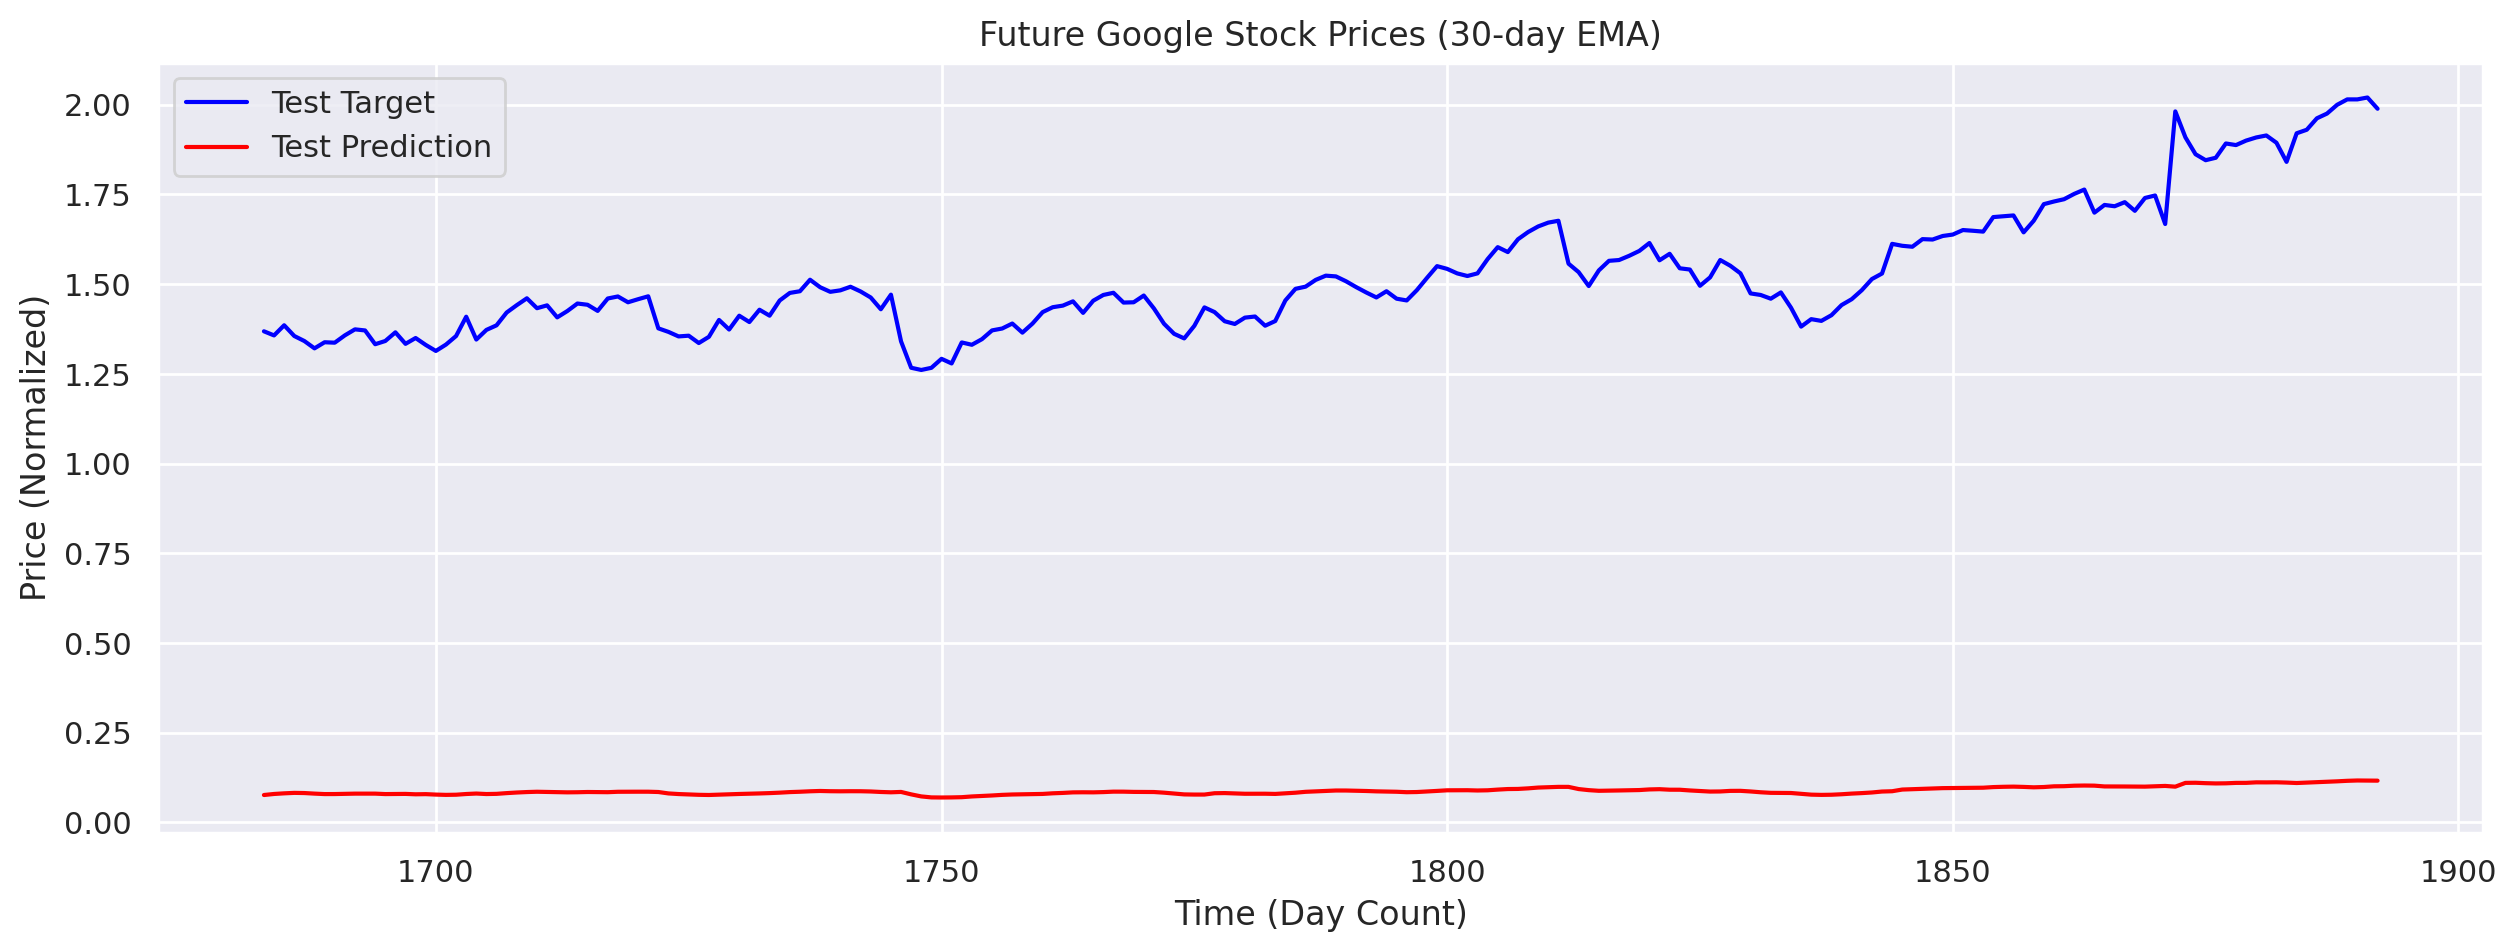

In [37]:
# Plot the results for 30-day predictions
idx = 0  # Index of the target feature to visualize, adjust if necessary
plt.figure(figsize=(15, 5), dpi=200)

# Plot the test targets
plt.plot(np.arange(y_train_30d.shape[0], y_train_30d.shape[0] + y_test_30d.shape[0]),
         y_test_30d[:, idx], color='blue', label='Test Target')

# Plot the test predictions for 30-day data
plt.plot(np.arange(y_train_30d.shape[0], y_train_30d.shape[0] + y_test_pred_30dall.shape[0]),
         y_test_pred_30dall[:, idx], color='red', label='Test Prediction')

plt.title('Future Google Stock Prices (30-day EMA)')
plt.xlabel('Time (Day Count)')
plt.ylabel('Price (Normalized)')
plt.legend(loc='best')
plt.show()


# Model Number 2: 9 Days with all features

In [38]:
model_9d_all = NeuralNetwork(5)  # Assuming 5 input features (like Open, High, Low, etc.)


In [39]:
optimizer = optim.Adam(model_9d_all.parameters())
mse = nn.MSELoss()

In [40]:
def train(dataloader):
    epoch_loss = 0
    model_9d_all.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x, y = batch
        pred = model_9d_all(x)
        loss = mse(pred[:, 0], y[:, 0])  # Matching the correct dimensions
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss


In [41]:
def evaluate(dataloader):
    epoch_loss = 0
    model_9d_all.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x, y = batch
            pred = model_9d_all(x)
            loss = mse(pred[:, 0], y[:, 0])  # Ensure correct dimensionality for evaluation
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

In [42]:
n_epochs = 100
best_valid_loss_9d_all = float('inf')

for epoch in range(1, n_epochs + 1):
    train_loss_9d_all = train(train_dataloader_9d)  # Updated to 9d_all
    valid_loss_9d_all = evaluate(valid_dataloader_9d)
    
    # Save the best model
    if valid_loss_9d_all < best_valid_loss_9d_all:
        best_valid_loss_9d_all = valid_loss_9d_all
        torch.save(model_9d_all, 'saved_weights_9d_all.pt')

    # Print training and validation loss
    print(f'\tTrain Loss: {train_loss_9d_all:.5f} | ' + f'\tVal Loss: {valid_loss_9d_all:.5f}\n')

	Train Loss: 0.25638 | 	Val Loss: 0.01577

	Train Loss: 3.56676 | 	Val Loss: 0.15218

	Train Loss: 2.86795 | 	Val Loss: 0.07941

	Train Loss: 0.75270 | 	Val Loss: 0.00178

	Train Loss: 0.21548 | 	Val Loss: 0.00390

	Train Loss: 0.10026 | 	Val Loss: 0.00297

	Train Loss: 0.14505 | 	Val Loss: 0.00575

	Train Loss: 0.21341 | 	Val Loss: 0.01151

	Train Loss: 0.24818 | 	Val Loss: 0.01630

	Train Loss: 0.22682 | 	Val Loss: 0.01633

	Train Loss: 0.18953 | 	Val Loss: 0.01424

	Train Loss: 0.16383 | 	Val Loss: 0.01221

	Train Loss: 0.14960 | 	Val Loss: 0.01084

	Train Loss: 0.14299 | 	Val Loss: 0.01012

	Train Loss: 0.14069 | 	Val Loss: 0.00983

	Train Loss: 0.13992 | 	Val Loss: 0.00975

	Train Loss: 0.13894 | 	Val Loss: 0.00970

	Train Loss: 0.13705 | 	Val Loss: 0.00960

	Train Loss: 0.13426 | 	Val Loss: 0.00942

	Train Loss: 0.13083 | 	Val Loss: 0.00917

	Train Loss: 0.12709 | 	Val Loss: 0.00887

	Train Loss: 0.12333 | 	Val Loss: 0.00855

	Train Loss: 0.11972 | 	Val Loss: 0.00824

	Train Loss

In [43]:
# Load the trained model
model_9d_all = torch.load('saved_weights_9d_all.pt')

In [44]:
# Convert test data to tensor for 9-day EMA with all features
x_test_9dall = torch.tensor(x_test_9d).float()

# Get predictions from the model
with torch.no_grad():
    y_test_pred_9dall = model_9d_all(x_test_9dall)

# Convert predictions to numpy
y_test_pred_9dall = y_test_pred_9dall.numpy()


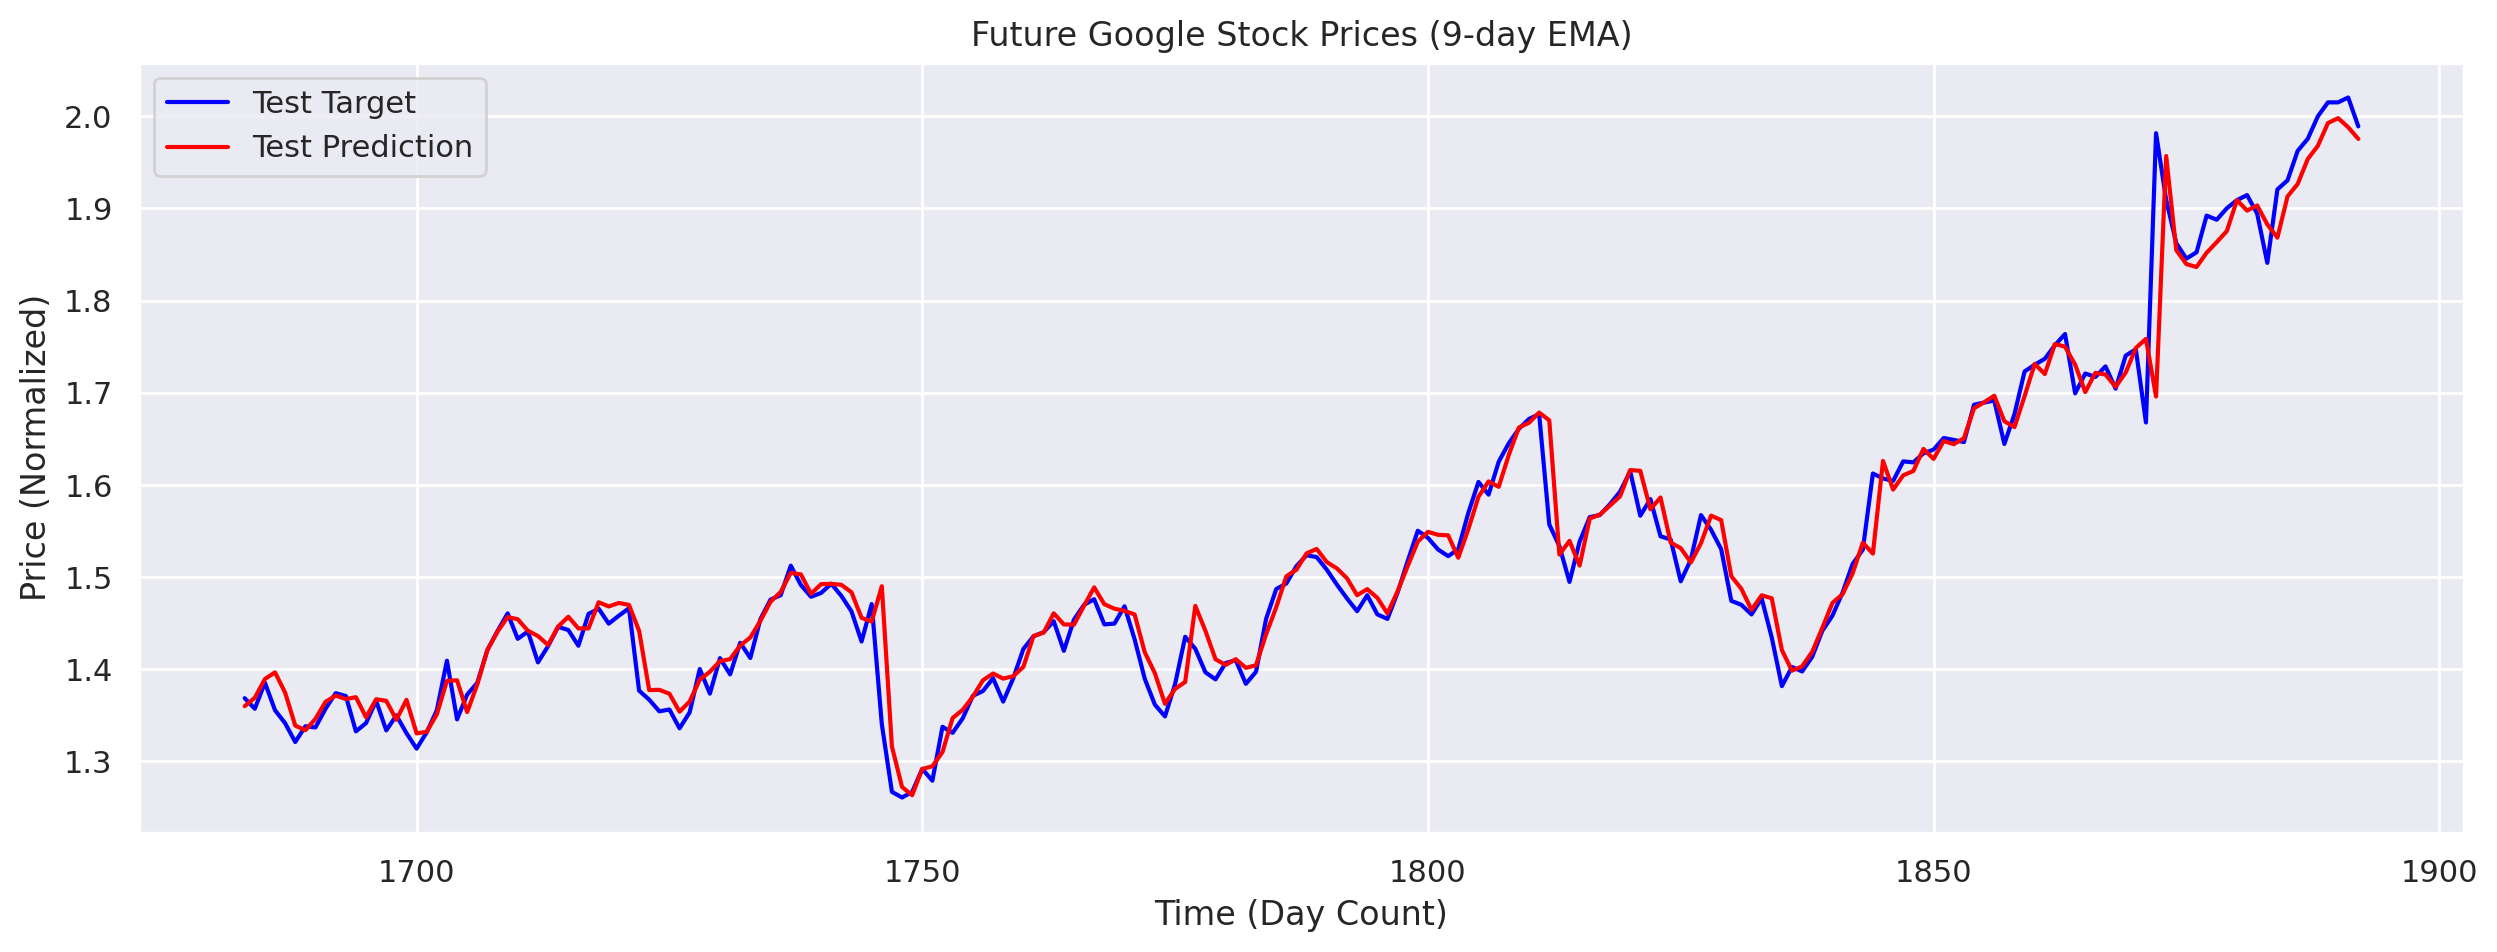

In [45]:
# Plot the results for 9-day predictions
idx = 0  # Index of the target feature to visualize, adjust if necessary
plt.figure(figsize=(15, 5), dpi=200)

# Plot the test targets for 9-day data
plt.plot(np.arange(y_train_9d.shape[0], y_train_9d.shape[0] + y_test_9d.shape[0]),
         y_test_9d[:, idx], color='blue', label='Test Target')

# Plot the test predictions for 9-day data
plt.plot(np.arange(y_train_9d.shape[0], y_train_9d.shape[0] + y_test_pred_9dall.shape[0]),
         y_test_pred_9dall[:, idx], color='red', label='Test Prediction')

plt.title('Future Google Stock Prices (9-day EMA)')
plt.xlabel('Time (Day Count)')
plt.ylabel('Price (Normalized)')
plt.legend(loc='best')
plt.show()


# Model Number 3: 21 Days with all features

In [46]:
# Define the model for 21d dataset
model_21d_all = NeuralNetwork(5)  # 5 input features

In [47]:
# Define optimizer and loss function
optimizer = optim.Adam(model_21d_all.parameters())
mse = nn.MSELoss()

In [48]:
def train(dataloader):
    epoch_loss = 0
    model_21d_all.train()
    
    for batch in dataloader:
        optimizer.zero_grad()
        x, y = batch
        pred = model_21d_all(x)
        # Adjust loss calculation
        loss = mse(pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
    return epoch_loss

In [49]:
def evaluate(dataloader):
    epoch_loss = 0
    model_21d_all.eval()  
    
    with torch.no_grad():
        for batch in dataloader:   
            x, y = batch
            pred = model_21d_all(x)
            loss = mse(pred[:, 0], y[:, 0])  # Ensure correct dimensionality for evaluation
            epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

In [50]:
n_epochs = 100
best_valid_loss_21dall = float('inf')

for epoch in range(1, n_epochs + 1):
    train_loss_21dall = train(train_dataloader_21d)
    valid_loss_21dall = evaluate(valid_dataloader_21d)
    
    # Save the best model
    if valid_loss_21dall < best_valid_loss_21dall:
        best_valid_loss_21dall = valid_loss_21dall
        torch.save(model_21d_all, 'saved_weights_21dall.pt')

    # Print training and validation loss
    print(f'\tTrain Loss: {train_loss_21dall:.5f} | ' + f'\tVal Loss: {valid_loss_21dall:.5f}\n')


	Train Loss: 1.14595 | 	Val Loss: 0.12468

	Train Loss: 9.47647 | 	Val Loss: 0.04197

	Train Loss: 2.79400 | 	Val Loss: 0.06018

	Train Loss: 0.44343 | 	Val Loss: 0.02409

	Train Loss: 0.19342 | 	Val Loss: 0.00603

	Train Loss: 0.16409 | 	Val Loss: 0.00342

	Train Loss: 0.16758 | 	Val Loss: 0.00425

	Train Loss: 0.24686 | 	Val Loss: 0.01027

	Train Loss: 0.42340 | 	Val Loss: 0.03165

	Train Loss: 0.48809 | 	Val Loss: 0.04689

	Train Loss: 0.32496 | 	Val Loss: 0.02948

	Train Loss: 0.20375 | 	Val Loss: 0.01629

	Train Loss: 0.15868 | 	Val Loss: 0.01082

	Train Loss: 0.14933 | 	Val Loss: 0.00945

	Train Loss: 0.17029 | 	Val Loss: 0.01077

	Train Loss: 0.21078 | 	Val Loss: 0.01460

	Train Loss: 0.24631 | 	Val Loss: 0.01940

	Train Loss: 0.25034 | 	Val Loss: 0.02131

	Train Loss: 0.23084 | 	Val Loss: 0.01931

	Train Loss: 0.20316 | 	Val Loss: 0.01640

	Train Loss: 0.17841 | 	Val Loss: 0.01385

	Train Loss: 0.16109 | 	Val Loss: 0.01207

	Train Loss: 0.15107 | 	Val Loss: 0.01098

	Train Loss

In [51]:
# Load the trained model
model_21d_all = torch.load('saved_weights_21dall.pt')

In [52]:
# Convert test data to tensor for 21-day EMA
x_test_21dall = torch.tensor(x_test_21d).float()

# Get predictions from the model
with torch.no_grad():
    y_test_pred_all = model_21d_all(x_test_21dall)

# Convert predictions to numpy
y_test_pred_21dall = y_test_pred_all.numpy()


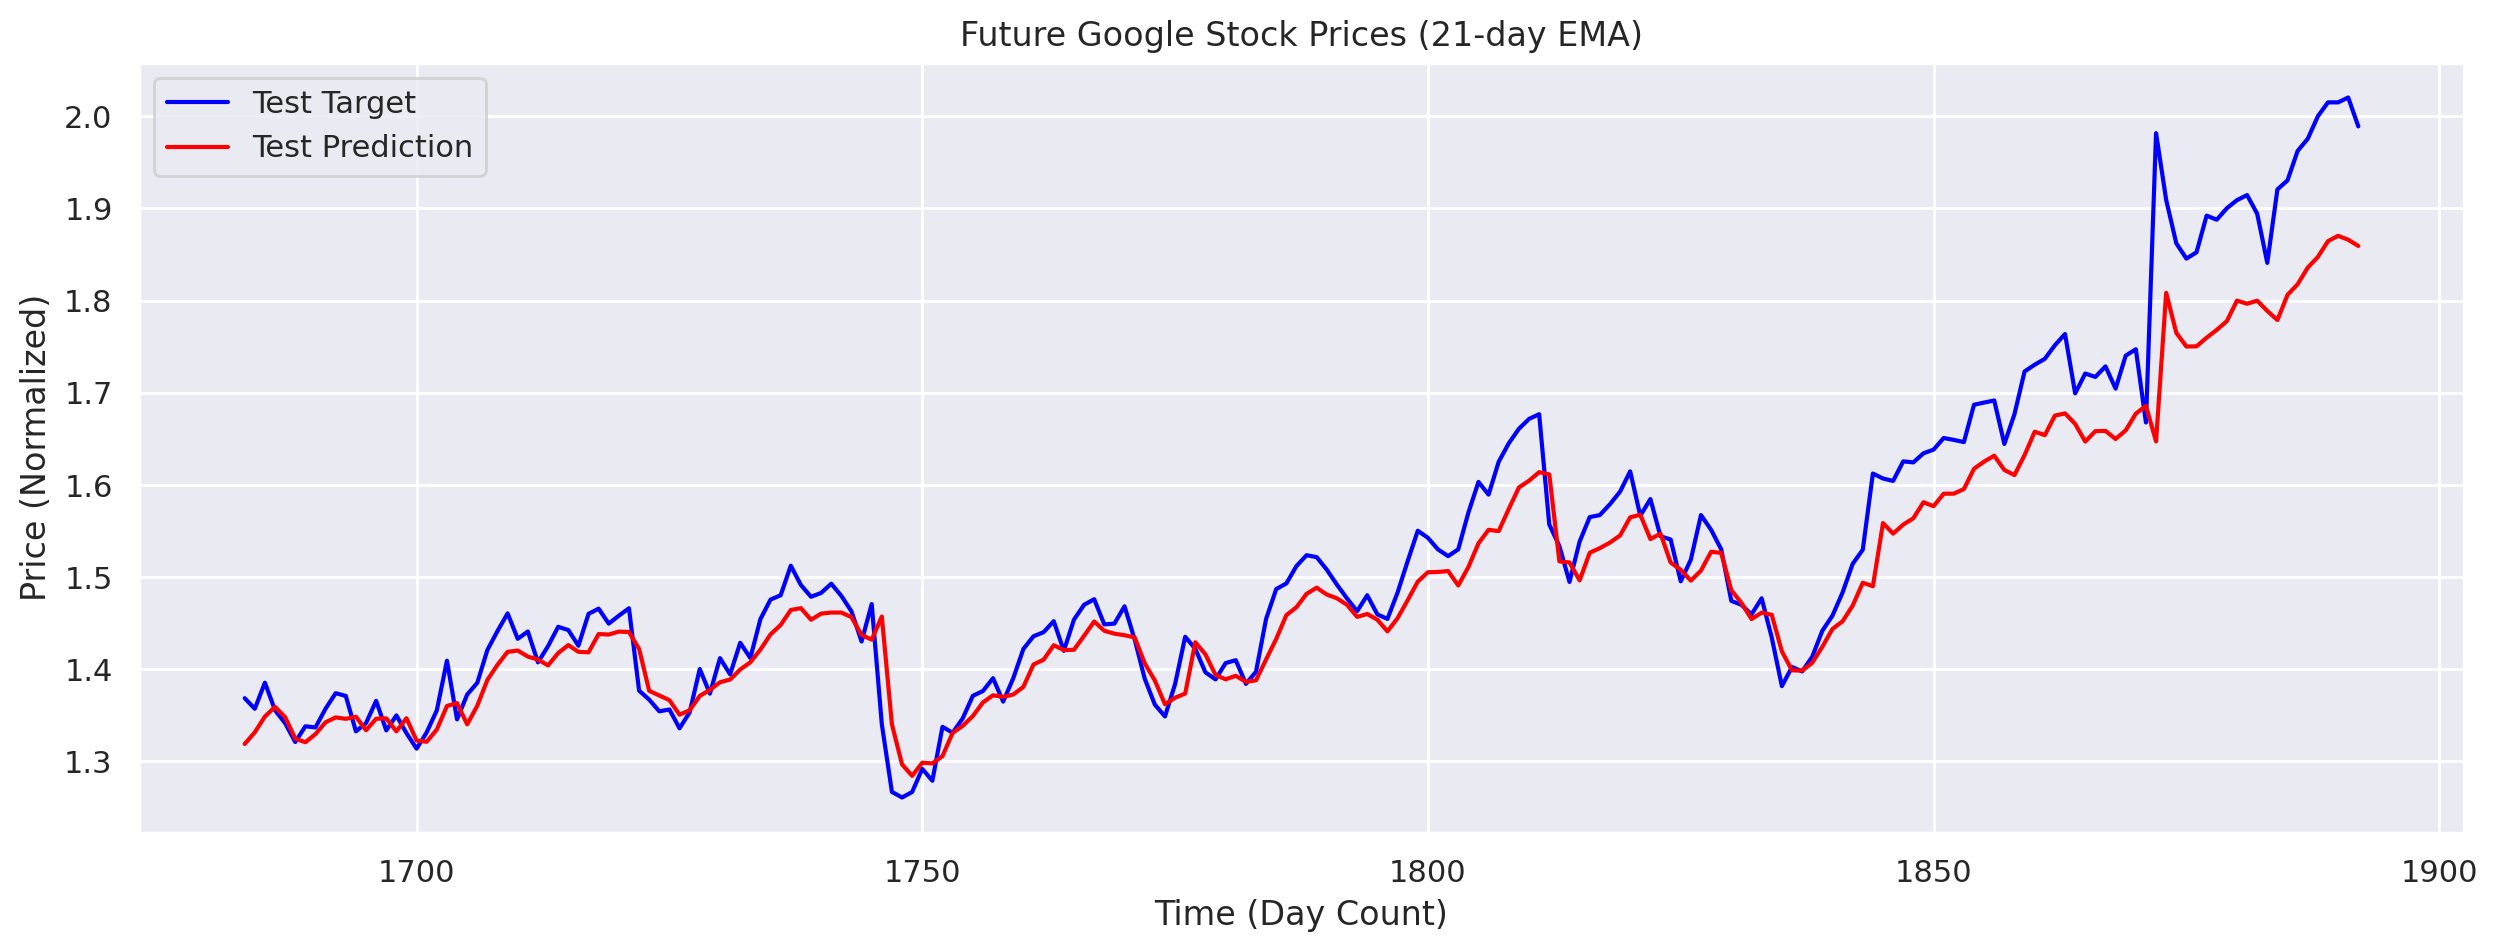

In [53]:
# Plot the results for 21-day predictions
idx = 0  # Index of the target feature to visualize, adjust if necessary
plt.figure(figsize=(15, 5), dpi=200)

# Plot the test targets for 21-day data
plt.plot(np.arange(y_train_21d.shape[0], y_train_21d.shape[0] + y_test_21d.shape[0]),
         y_test_21d[:, idx], color='blue', label='Test Target')

# Plot the test predictions for 21-day data
plt.plot(np.arange(y_train_21d.shape[0], y_train_21d.shape[0] + y_test_pred_21dall.shape[0]),
         y_test_pred_21dall[:, idx], color='red', label='Test Prediction')

plt.title('Future Google Stock Prices (21-day EMA)')
plt.xlabel('Time (Day Count)')
plt.ylabel('Price (Normalized)')
plt.legend(loc='best')
plt.show()

<a id="8"></a>
# <p style="padding:10px;background-color:#2c8ae1 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Results Evaluation</p>

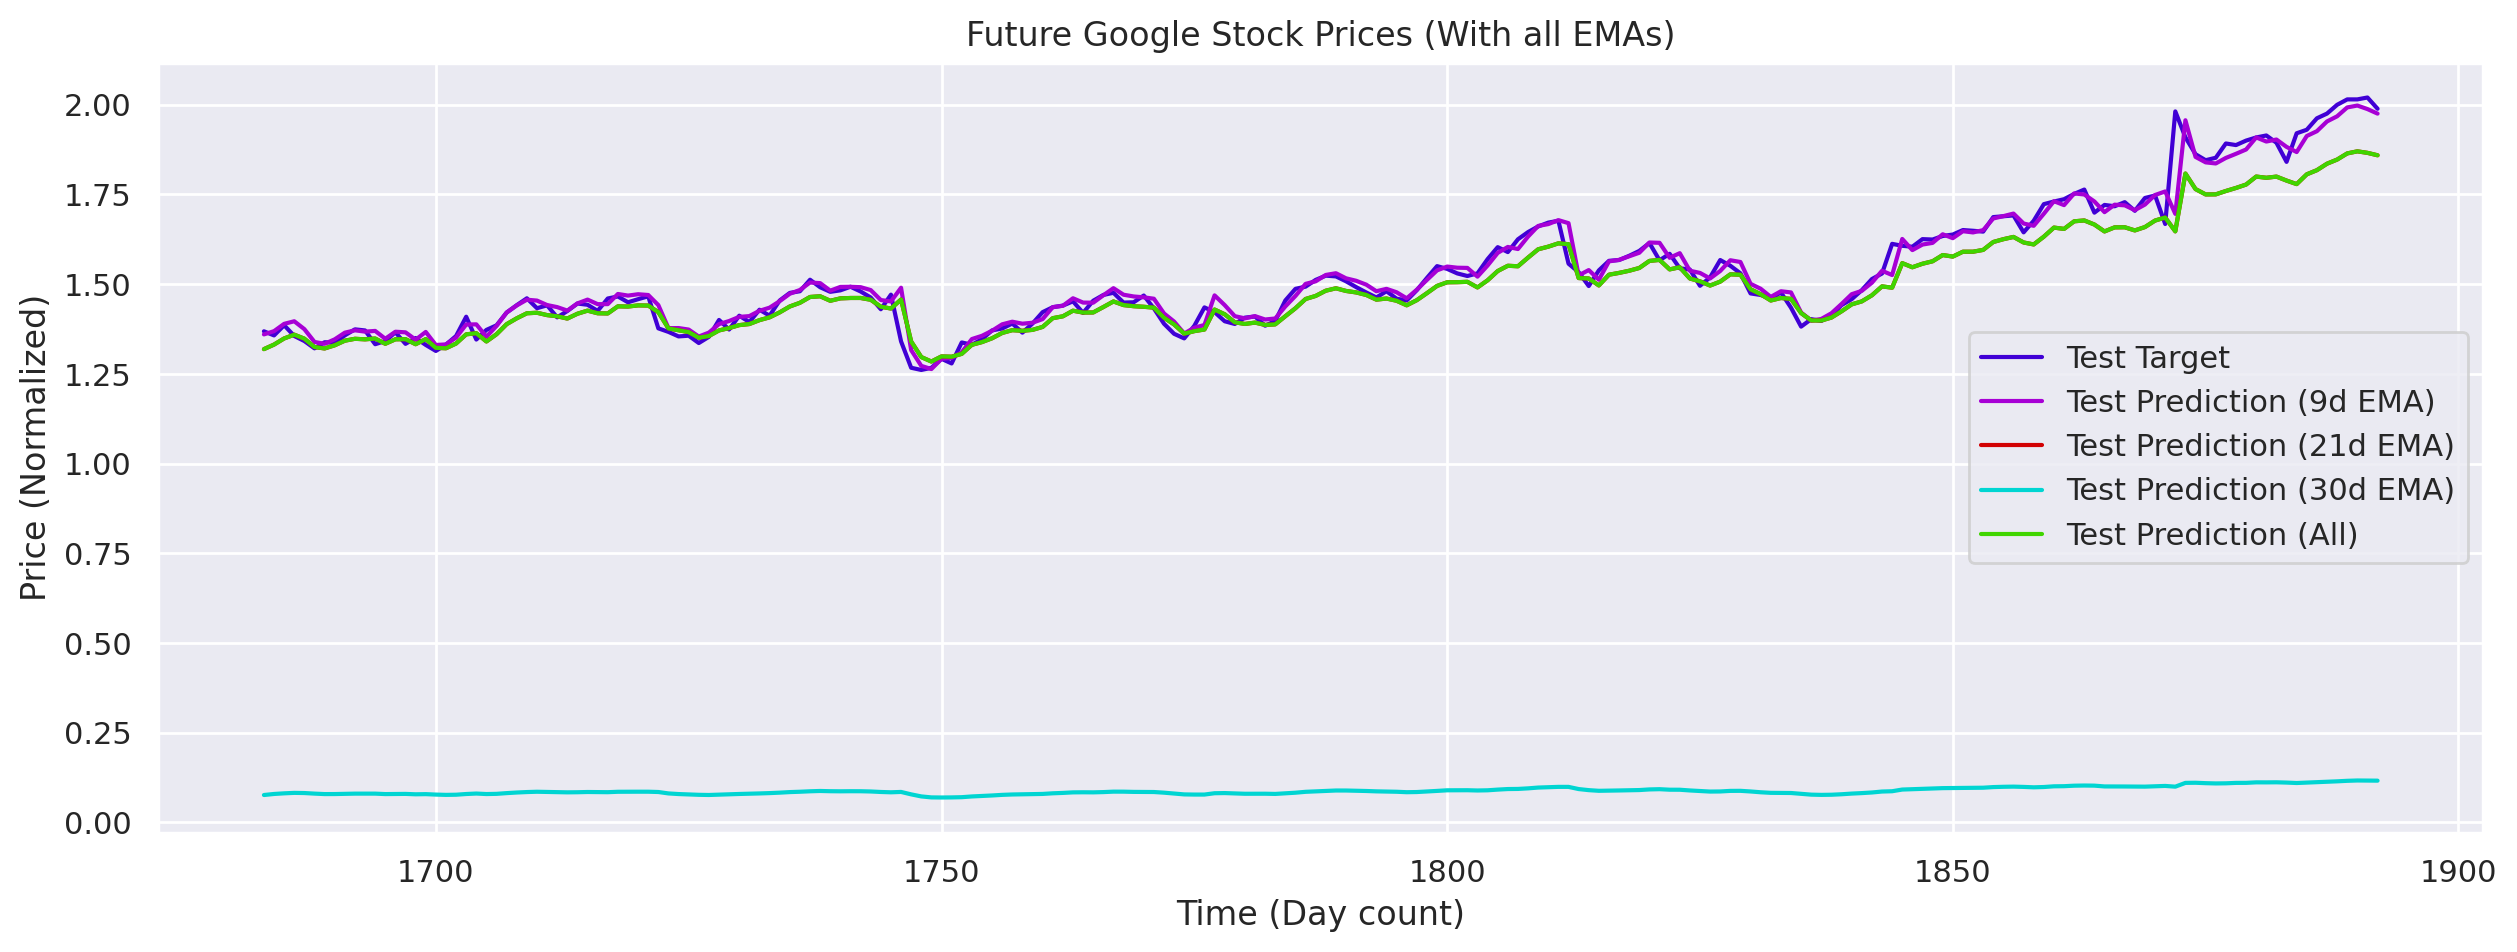

In [54]:
idx = 0  # Index of the target feature to visualize
plt.figure(figsize=(15, 5), dpi=200)

# Plot the test targets
plt.plot(np.arange(y_train_9d.shape[0], y_train_9d.shape[0] + y_test_9d.shape[0]),
         y_test_9d[:, idx], color='#4000D5', label='Test Target')

# Plot the test predictions for 9-day
plt.plot(np.arange(y_train_9d.shape[0], y_train_9d.shape[0] + y_test_pred_9dall.shape[0]),
         y_test_pred_9dall[:, idx], color='#A700D5', label='Test Prediction (9d EMA)')

# Plot the test predictions for 21-day
plt.plot(np.arange(y_train_21d.shape[0], y_train_21d.shape[0] + y_test_pred_21dall.shape[0]),
         y_test_pred_21dall[:, idx], color='#D20103', label='Test Prediction (21d EMA)')

# Plot the test predictions for 30-day
plt.plot(np.arange(y_train_30d.shape[0], y_train_30d.shape[0] + y_test_pred_30dall.shape[0]),
         y_test_pred_30dall[:, idx], color='#00D5D2', label='Test Prediction (30d EMA)')

# Plot the test predictions for all combined models
plt.plot(np.arange(y_train_all.shape[0], y_train_all.shape[0] + y_test_pred_all.shape[0]),
         y_test_pred_all[:, idx], color='#40D500', label='Test Prediction (All)')

# Set titles and labels
plt.title('Future Google Stock Prices (With all EMAs)')
plt.xlabel('Time (Day count)')
plt.ylabel('Price (Normalized)')
plt.legend(loc='best')
plt.show()


In [55]:
import plotly.graph_objects as go

# Create the candlestick chart for actual stock prices
candlestick = go.Candlestick(x=np.arange(len(y_test_9d)),
                             open=y_test_9d[:, 0], high=y_test_9d[:, 1],
                             low=y_test_9d[:, 2], close=y_test_9d[:, 3],
                             name='Candlestick')

# Create prediction lines for 9-day, 21-day, 30-day, and all models
line_9d = go.Scatter(x=np.arange(len(y_test_pred_9dall)), y=y_test_pred_9dall[:, idx],
                     mode='lines', name='Prediction (9d EMA)', line=dict(color='#A700D5'))

line_21d = go.Scatter(x=np.arange(len(y_test_pred_21dall)), y=y_test_pred_21dall[:, idx],
                      mode='lines', name='Prediction (21d EMA)', line=dict(color='#D20103', dash='dash'))

line_30d = go.Scatter(x=np.arange(len(y_test_pred_30dall)), y=y_test_pred_30dall[:, idx],
                      mode='lines', name='Prediction (30d EMA)', line=dict(color='#00D5D2', dash='dot'))

line_all = go.Scatter(x=np.arange(len(y_test_pred_all)), y=y_test_pred_all[:, idx],
                      mode='lines', name='Prediction (All)', line=dict(color='#40D500'))

# Combine all traces into one figure
fig = go.Figure(data=[candlestick, line_9d, line_21d, line_30d, line_all])

# Update layout to increase chart size
fig.update_layout(title='Future Google Stock Prices with Predictions',
                  xaxis_title='Time (Day count)', yaxis_title='Price (Normalized)',
                  xaxis_rangeslider_visible=False,
                  width=1100, height=750)  # Adjust the width and height here

# Show the plot
fig.show()
